# 📅 Day 3 — Exploratory Data Analysis (EDA)

![EDA](https://github.com/ValRCS/RTU_Data_Analysis_Visualization_CPD/blob/main/img/icons/EDA.png?raw=true)

## Previously…

In the last sessions, we focused on the **hard but essential work** of data handling:  
- acquiring datasets from different sources,  
- cleaning messy values and duplicates,  
- preparing and transforming data into usable formats.  

That stage often feels technical and sometimes tedious — but it builds the foundation for everything that follows.  

Now, we shift to the part many find most **enjoyable and rewarding**: **exploring the data**.  
Through **visualizations, summaries, and pattern discovery**, we get to uncover the stories hidden inside the dataset. This is the essence of **Exploratory Data Analysis (EDA)**.  


## EDA – Importance and Meaning

Exploratory Data Analysis (EDA) is the process of **getting to know your dataset** before applying advanced models or drawing conclusions.  
It is a critical step in any data analysis workflow (after initial acquisition, cleaning and preparation) because it helps you:

- **Understand structure**: Identify variable types (numerical, categorical, date, text) and the shape of the dataset.  
- **Detect issues**: Spot missing values, inconsistencies, and potential data quality problems.  
- **Summarize key statistics**: Compute central tendencies, spread, correlations, and distributions to build intuition.  
- **Reveal patterns**: Use plots and summaries to see trends, clusters, and group differences.  
- **Identify anomalies**: Highlight unusual points or outliers that may skew results.  
- **Guide decisions**: Inform which cleaning, transformation, or modeling approaches make sense for the dataset.  

Think of EDA as the **detective work** of data analysis. Instead of jumping into advanced models right away, you first explore the dataset to generate hypotheses, validate assumptions, and prepare the ground for deeper analysis.


## Titanic – The Story We Know

![Titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/St%C3%B6wer_Titanic.jpg/600px-St%C3%B6wer_Titanic.jpg)

The RMS Titanic was one of the largest and most luxurious ocean liners of its time, celebrated as “unsinkable” when it set sail on its maiden voyage from Southampton to New York in April 1912. Tragically, on the night of April 14th, the ship struck an iceberg in the North Atlantic and sank in the early hours of April 15th. Of the more than 2,200 passengers and crew aboard, over 1,500 lost their lives, making it one of the deadliest peacetime maritime disasters in history.

The Titanic disaster has been studied for decades, not only as a historical event but also as a data source. Passenger records — including age, gender, class, ticket fare, and survival outcome — were compiled from official lists and archives. Today, these records form the basis of the famous **Titanic dataset**, widely used in teaching data analysis and machine learning. It allows us to explore how social and economic factors influenced survival, offering a powerful case study in how data can tell human stories.



## 🛳 The Titanic Dataset

The **Titanic dataset** records information about passengers aboard the RMS Titanic.
It contains a mix of **numerical** and **categorical** variables, as well as **missing data**, **outliers**,
and a **binary target variable** (survival).

We will use Seaborn's built-in Titanic dataset (~891 rows, 15 columns).


## Seaborn – Statistical Data Visualization in Python

[Seaborn](https://seaborn.pydata.org/) is a Python library built on top of **matplotlib** that makes it easier to create clear, attractive, and informative statistical visualizations.  
It comes with **high-level functions** for common plot types such as histograms, scatterplots, boxplots, heatmaps, and regression plots, while handling details like color palettes and axis formatting automatically.  

In this course, we use Seaborn to:
- Quickly explore **distributions** (age, fare)  
- Compare **categories** (survival by sex, class)  
- Visualize **correlations** (heatmaps of numerical features)  
- Highlight **outliers and patterns** in the Titanic dataset  

### Seaborn in Google Colab
Google Colab includes Seaborn **pre-installed**, so you can simply import and use it without setup:

```python
import seaborn as sns
import matplotlib.pyplot as plt


### Loading Libraries


In [1]:
from datetime import datetime
print(f"Today is {datetime.now()}")
import pandas as pd  # we need this for Dataframe and analysis
import seaborn as sns # so seaborn for dataset and visualization
# print seaborn version
print(f"Seaborn version: {sns.__version__}")
import matplotlib.pyplot as plt # the underlaying library for visuals that seaborn, like seaborn matlplot is included with Google Colab


Today is 2025-10-30 16:11:05.045997
Seaborn version: 0.13.2


### Checking what data sets Seaborn offers

In [2]:
# let's check what datasets seaborn offers
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:

# Load Titanic dataset from seaborn
titanic = sns.load_dataset("titanic")
# assign alias of df to titanic
df = titanic # now df and titanic point to same dataset THIS IS NOT A COPY
# if you want copy you would use
# df = titanic.copy() # this would be a good idea to do before any untested operation where you are unsure
print("Titanic dataset loaded")
# shape
print(titanic.shape)
print(f"Titanic dataset has {titanic.shape[0]} rows and {titanic.shape[1]} columns")
# we could have printed row count and column count using len
print(f"Titanic dataset has {len(titanic)} rows and {len(titanic.columns)} columns")
titanic.head() # so first five rows by default, could have other number


Titanic dataset loaded
(891, 15)
Titanic dataset has 891 rows and 15 columns
Titanic dataset has 891 rows and 15 columns


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



### Key Features in the Seaborn Version
- **survived**: Whether the passenger survived (0 = No, 1 = Yes)  
- **pclass**: Passenger class (1st, 2nd, 3rd)  
- **sex**: Male or female  
- **age**: Age of passenger in years  
- **sibsp**: Number of siblings/spouses aboard  
- **parch**: Number of parents/children aboard  
- **fare**: Ticket fare (in British pounds)  
- **embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)  
- **class**: Duplicate categorical version of `pclass`  
- **who**: Man, woman, or child (based on sex and age)  
- **deck**: Cabin deck (many missing)  
- **embark_town**: Full name of embarkation port  
- **alive**: Duplicate categorical version of `survived`  
- **alone**: Whether passenger was alone or not  


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Tidy Data Format

A dataset is considered **tidy** when it follows a consistent structure that makes analysis and visualization easier.  
In tidy data:  

- **Each variable** forms a **column**.  
- **Each observation (measurement)** forms a **row**.  
- **Each type of observational unit** forms a **table**.  

For example, in the Titanic dataset:  
- Variables: `age`, `fare`, `sex`, `class`, `survived` → each has its own column.  
- Observations: each passenger → one row with their age, fare, sex, etc.  
- Dataset: passengers → stored together in a single table.  

### Why tidy data matters
- Functions in **pandas**, **seaborn**, and other Python libraries are designed with tidy data in mind.  
- It makes filtering, grouping, and visualization straightforward.  
- Untidy data (e.g., multiple variables in one column, or one variable spread across multiple columns) often needs to be **reshaped** before analysis.  

In short: **tidy data = one row per measurement, one column per variable**. This consistency is what makes tools like pandas and seaborn so effective.


## 📚 Instruction (3h)

### 1. Descriptive Statistics


#### Measures of Central Tendency: Mean, Median, Mode
We use measures like mean, median, and mode to summarize central tendencies in data.
For example, average passenger age or the most common embarkation port.

#### Refresher of your statistics

* mean - the average value of a numerical variable
* median - the middle value when data is sorted
* mode - the most frequently occurring value in a variable


In [6]:

# Mean, Median, Mode examples
# we just take the column name and use the appropriate function
print("Mean age:", titanic['age'].mean())
print("Median age:", titanic['age'].median())
print("Mode embark_town:", titanic['embark_town'].mode()[0])
# print("Mode embark_town:", titanic['embark_town'].mode()) # also gives Southampton but in less readable format


Mean age: 29.69911764705882
Median age: 28.0
Mode embark_town: Southampton


In [7]:
# we can find out the value counts of embark_town
titanic['embark_town'].value_counts()

,count
embark_town,
Southampton,644
Cherbourg,168
Queenstown,77


In [8]:
# provide percentages for each city in embark_town
# display only 2 digits after comma, change 2 to whatever number you want to see of digits after comma
pd.options.display.float_format = '{:.2f}'.format
titanic['embark_town'].value_counts(normalize=True)*100

,proportion
embark_town,
Southampton,72.44
Cherbourg,18.90
Queenstown,8.66


In [14]:
# convert to dataframe titanic['embark_town'].value_counts()
embark_df = titanic['embark_town'].value_counts().to_frame()
embark_df.head()

,count
embark_town,
Southampton,644
Cherbourg,168
Queenstown,77


In [15]:
# let's make a ratio column by dividing count with sum of all
embark_df['percentage'] = embark_df / embark_df.sum() * 100

embark_df.head()

,count,percentage
embark_town,,
Southampton,644,72.44
Cherbourg,168,18.90
Queenstown,77,8.66


## Mean, Median, Mode – When to Use Which?

When analyzing data, the **mean**, **median**, and **mode** are three key measures of central tendency. Each highlights a different aspect of the "typical" value in a dataset, and each has strengths and weaknesses depending on the context.

- **Mean (average)** is best when the data is **continuous, symmetric, and free of extreme outliers**. For example, the average age of Titanic passengers gives a good sense of the general group, but it would be skewed if just a few passengers had extremely high ages recorded incorrectly.  
- **Median (middle value)** is preferred when data is **skewed or contains outliers**, because it is more robust. In the Titanic dataset, the **median fare** is much lower than the mean fare, since a few wealthy first-class passengers paid disproportionately high prices.  
- **Mode (most frequent value)** is especially useful for **categorical or discrete data**. For instance, the mode of `embarked` tells us the most common port of departure, or the mode of `pclass` reveals the most common travel class. For numerical data, mode is less often used unless the data is heavily discrete (e.g., number of siblings).

In practice:
- Use the **mean** for normally distributed data without large outliers.  
- Use the **median** when distributions are skewed or when robustness is needed.  
- Use the **mode** when dealing with categorical or discrete variables where frequency matters.  

Together, these three measures provide a more complete picture of a dataset’s central tendency than any one measure alone.


#### Measures of Spread: Variance, Standard Deviation, Quartiles
Spread measures help us understand variability in the dataset.
Titanic fares vary widely across classes.

#### Refresher of your statistics

* variance ($\sigma^2$ or $s^2$) - the average of the squared differences from the mean
* standard deviation ($\sigma$ or $s$) - the square root of variance, indicating typical deviation from the mean
* quartiles - values that divide the data into four equal parts (Q1, Q2/median, Q3, IQR)

In [16]:

print("Fare variance:", titanic['fare'].var())
print("Fare standard deviation:", titanic['fare'].std())
print("Fare quartiles:")
print(titanic['fare'].describe()[3:8]) # so we take 4th to 7th column here, we start at column 0


Fare variance: 2469.436845743117
Fare standard deviation: 49.693428597180905
Fare quartiles:
min     0.00
25%     7.91
50%    14.45
75%    31.00
max   512.33
Name: fare, dtype: float64


In [17]:
# what is median for fare?
titanic['fare'].median()

14.4542

In [18]:
# we can get most of these statistics all at once with describe
titanic['fare'].describe()
# in above cell we used [4:7] to get 5th, 6th, and 7th entries, we do not include the last index in our slice that is 8th entry (with index 7) is not included


,fare
count,891.00
mean,32.20
std,49.69
min,0.00
25%,7.91
50%,14.45
75%,31.00
max,512.33


## Measures of Spread: Variance, Standard Deviation, Quartiles – When to Use Which?

While measures of central tendency tell us the "typical" value, **measures of spread** describe how much the data varies. They show whether the values are tightly clustered or widely dispersed. The three most common measures are **variance**, **standard deviation**, and **quartiles**.

- **Variance** measures the *average squared deviation* from the mean. It is mathematically important in statistics and probability theory, especially in advanced modeling. However, because it is expressed in squared units (e.g., age²), it is less intuitive to interpret directly.  

- **Standard Deviation (SD)** is the square root of variance and is expressed in the same units as the data. This makes it much easier to interpret. A low SD means the data points are close to the mean, while a high SD indicates more spread. For Titanic, the **standard deviation of fare** shows how widely ticket prices varied among passengers.  

- **Quartiles and Interquartile Range (IQR)** divide the dataset into four equal parts. Q1 is the 25th percentile, Q2 is the median, and Q3 is the 75th percentile. The **IQR (Q3 – Q1)** captures the middle 50% of data, making it very robust against outliers. On Titanic, quartiles are useful for understanding the distribution of fares across different classes, where extreme values (luxury fares) would distort the mean and SD.

### When to Use Which?
- Use **variance** in theoretical or mathematical contexts, especially when working with probability distributions or regression models.  
- Use **standard deviation** when you need a practical, intuitive measure of spread in the same units as your data.  
- Use **quartiles and IQR** when data is skewed or has outliers, as they provide a resistant summary of distribution.  

In practice, analysts often report both **median + IQR** (robust view) and **mean + SD** (classical view) to give a balanced picture of spread.



#### Skewness & Kurtosis
Skewness shows asymmetry in distributions, while kurtosis measures tail heaviness.

#### Refresher of your statistics

* skewness - a measure of asymmetry in a distribution (positive = right tail, negative = left tail)
* kurtosis - a measure of the "tailedness" of a distribution (high kurtosis = heavy tails, low kurtosis = light tails)

More on formulas for these on wiki:
* https://en.wikipedia.org/wiki/Skewness
* https://en.wikipedia.org/wiki/Kurtosis


In [19]:

print("Fare skewness:", titanic['fare'].skew())
print("Fare kurtosis:", titanic['fare'].kurt())


Fare skewness: 4.787316519674893
Fare kurtosis: 33.39814088089868


### Interpretation of Skewness and Kurtosis
- **Skewness**: A skewness value greater than 0 indicates a right-skewed distribution, while a value less than 0 indicates a left-skewed distribution. A value close to 0 suggests a symmetric distribution.
- **Kurtosis**: A kurtosis value greater than 3 indicates a distribution with heavier tails than a normal distribution (leptokurtic), while a value less than 3 indicates lighter tails (platykurtic). A kurtosis of exactly 3 corresponds to a normal distribution (mesokurtic).

In [20]:
# Let's measure skewness and kurtosis for all numerical columns at once
# first we would need to get only numeric columns
numeric_columns = titanic.select_dtypes(include=['number']) # this is not a copy just a view of original dataset
numeric_columns.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.00,1,0,7.25
1,1,1,38.00,1,0,71.28
2,1,3,26.00,0,0,7.92
3,1,1,35.00,1,0,53.10
4,0,3,35.00,0,0,8.05


In [21]:
# now we can measure all numeric columns at once for skew
numeric_columns.skew()

,0
survived,0.48
pclass,-0.63
age,0.39
sibsp,3.70
parch,2.75
fare,4.79


In [22]:
# similarly we can measure kurtosis for all numeric columns
numeric_columns.kurt()

,0
survived,-1.78
pclass,-1.28
age,0.18
sibsp,17.88
parch,9.78
fare,33.40


## Skewness and Kurtosis – When to Use Which?

Beyond central tendency and spread, it is also important to understand the **shape of a distribution**. Two key measures for this are **skewness** and **kurtosis**.

- **Skewness** measures the asymmetry of a distribution:  
  - A **skewness near 0** means the data is roughly symmetric (like a bell curve).  
  - **Positive skew** means the right tail is longer (e.g., Titanic fares: many passengers paid small amounts, but a few paid very high amounts).  
  - **Negative skew** means the left tail is longer (rare, but can occur in age if most passengers are older but a few very young drag the tail down).  
  Skewness is useful when you need to decide whether to apply transformations (like log-transforming highly skewed variables) before modeling.

- **Kurtosis** measures the "tailedness" or concentration of data in the extremes compared to a normal distribution:  
  - **Normal distribution** has kurtosis ≈ 0 (if using Fisher’s definition) or 3 (if using Pearson’s).  
  - **High kurtosis (leptokurtic)** means heavy tails and more outliers (Titanic fares again show this).  
  - **Low kurtosis (platykurtic)** means light tails and fewer outliers than normal.  
  Kurtosis is useful for assessing the presence of outliers and how extreme values may influence analysis.

### When to Use Which?
- Use **skewness** when you want to check for asymmetry and decide on transformations to make data more normal.  
- Use **kurtosis** when evaluating whether outliers are likely and how “peaked” or “flat” your distribution is compared to normal.  
- Both are most useful in **EDA before modeling**, especially when considering regression, correlation, or machine learning methods that assume normality.  

In practice, **skewness highlights direction of imbalance**, while **kurtosis highlights the weight of the tails**. Together, they help you understand if your data matches the assumptions of common statistical techniques or if adjustments are needed.


### Descriptive Statistics versus Visualizations

- Descriptive statistics provide numerical summaries of data, while visualizations offer graphical representations.
- Statistics give precise measures (e.g., mean, median), while visualizations reveal patterns, trends, and outliers.
- Both are complementary: statistics quantify, while visualizations illustrate.



## Anscombe’s Quartet – Why Visualization Matters

In 1973, statistician Francis Anscombe created four small datasets, now known as **Anscombe’s Quartet**, to highlight the importance of visualization in data analysis.  

![Quarter](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/960px-Anscombe%27s_quartet_3.svg.png)

Each dataset has (almost) identical **summary statistics**:  
- Same mean of x and y  
- Same variance of x and y  
- Same correlation between x and y  
- Same linear regression line  

Yet, when plotted, they look completely different:  
1. A nearly perfect linear relationship  
2. A clear non-linear curve  
3. A dataset where one outlier changes interpretation  
4. A dataset with a single influential point that drives the regression  

👉 The lesson: **statistics alone can be misleading**. Without visualization, we may miss underlying patterns, clusters, or anomalies.  

This concept is often extended with the **Datasaurus Dozen**, a modern set of datasets shaped like a dinosaur 🦖, star, or circle, all sharing very similar summary statistics but dramatically different shapes when plotted.  

**Key takeaway:** Always visualize your data during EDA — it may tell a very different story than the numbers suggest.


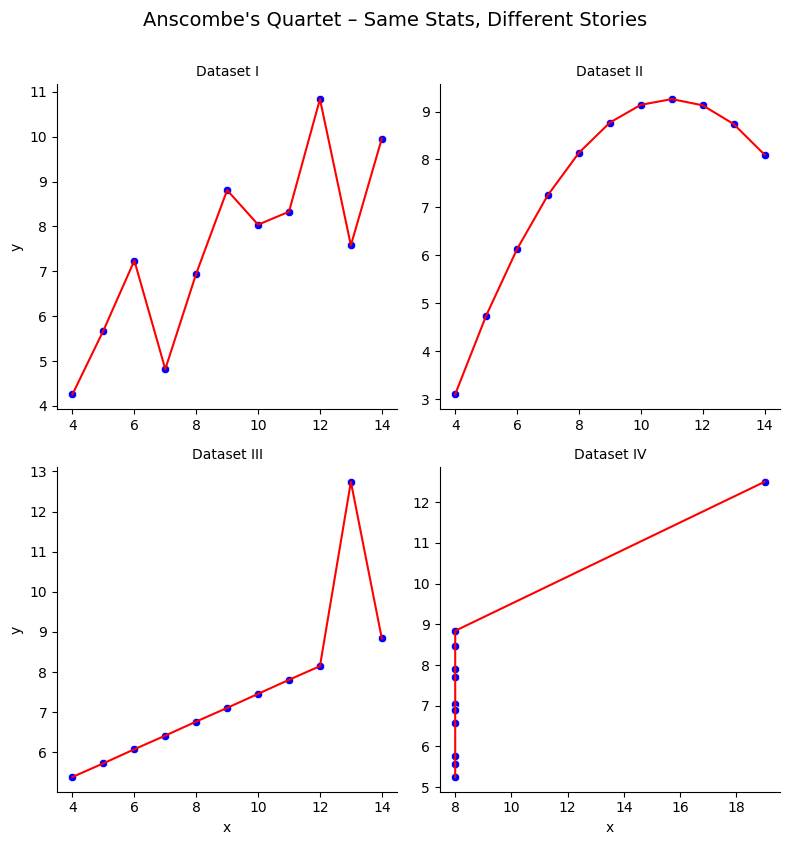

In [23]:
# Load Anscombe's Quartet dataset (built into Seaborn)
anscombe = sns.load_dataset("anscombe")

# Create FacetGrid: one plot per dataset (I, II, III, IV)
g = sns.FacetGrid(anscombe, col="dataset", col_wrap=2, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x="x", y="y", color="blue")
g.map_dataframe(sns.lineplot, x="x", y="y", color="red", estimator=None)  # regression line (for demo)

# Add titles
g.set_titles("Dataset {col_name}")
g.set_axis_labels("x", "y")
plt.suptitle("Anscombe's Quartet – Same Stats, Different Stories", y=1.05, fontsize=14)
plt.show()

In [24]:
# let's see what did we get
type(anscombe)

pandas.core.frame.DataFrame

In [25]:
# so this means we can just show it all
anscombe

,dataset,x,y
0,I,10.00,8.04
1,I,8.00,6.95
2,I,13.00,7.58
3,I,9.00,8.81
4,I,11.00,8.33
5,I,14.00,9.96
6,I,6.00,7.24
7,I,4.00,4.26
8,I,12.00,10.84
9,I,7.00,4.82


## The Datasaurus Dozen – Same Stats, Wildly Different Shapes

Building on the lesson of Anscombe’s Quartet, the **Datasaurus Dozen** is a modern collection of datasets created by Justin Matejka and George Fitzmaurice (2017). Each dataset has nearly identical **summary statistics** (same mean, standard deviation, and correlation), yet the points form dramatically different shapes when plotted.

Some examples include:  
- 🦖 A dinosaur (the famous “Datasaurus”)  
- ⭐ A star  
- ⚽ A circle or bullseye  
- 📈 Random scatter that still shares the same stats  

### Why it matters
- **Summary statistics can hide important details**.  
- **Visualization reveals structure** that numbers alone cannot capture.  
- Just like with Titanic data, relying only on averages and variances may cause us to miss crucial patterns.  

The Datasaurus Dozen reminds us that **EDA is not just about numbers — it’s about seeing the data.**  

👉 Key takeaway: Always plot your data. The shape, clusters, and outliers tell a story that summary measures cannot.


### 2. Distribution Exploration

#### Histograms

Histograms show the distribution of numerical variables.
For example, the age distribution of Titanic passengers.

In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [27]:
# how many missing ages we have in our age column
titanic[['age', 'fare']].isnull().sum() # we could have used also isna().sum()

,0
age,177
fare,0


In [28]:
# let's see if we have really cheap fares
cheap_passangers = titanic[titanic['fare'] < 1]
cheap_passangers.shape

(15, 15)

In [ ]:
cheap_passangers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
179,0,3,male,36.00,0,0,0.00,S,Third,man,True,NaN,Southampton,no,True
263,0,1,male,40.00,0,0,0.00,S,First,man,True,B,Southampton,no,True
271,1,3,male,25.00,0,0,0.00,S,Third,man,True,NaN,Southampton,yes,True
277,0,2,male,NaN,0,0,0.00,S,Second,man,True,NaN,Southampton,no,True
302,0,3,male,19.00,0,0,0.00,S,Third,man,True,NaN,Southampton,no,True
413,0,2,male,NaN,0,0,0.00,S,Second,man,True,NaN,Southampton,no,True
466,0,2,male,NaN,0,0,0.00,S,Second,man,True,NaN,Southampton,no,True
481,0,2,male,NaN,0,0,0.00,S,Second,man,True,NaN,Southampton,no,True
597,0,3,male,49.00,0,0,0.00,S,Third,man,True,NaN,Southampton,no,True
633,0,1,male,NaN,0,0,0.00,S,First,man,True,NaN,Southampton,no,True


In [29]:
titanic['age'].isnull()[:10]

,age
0,False
1,False
2,False
3,False
4,False
5,True
6,False
7,False
8,False
9,False


<Axes: xlabel='age', ylabel='Count'>

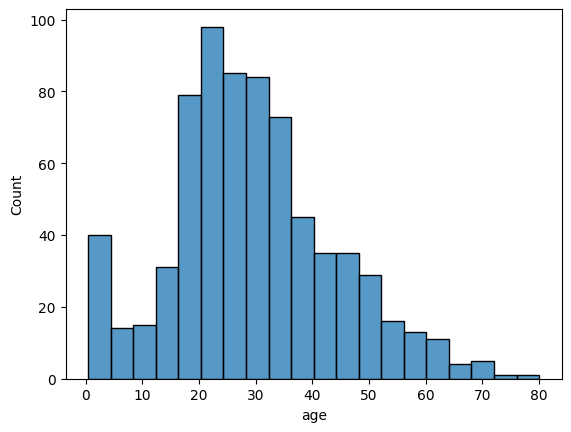

In [32]:
# so for plotting we often need to drop the missing values
# we have 177 passengers in this dataset without known age
# so we temporary drop them when plotting
# sns.histplot(titanic['age'].dropna(), bins=20, kde=False); # used to be that dropna() was required seems it is not needed anymore
sns.histplot(titanic['age'], bins=20, kde=False)

In [33]:
# let's create a new column that show cut for age column from 0 to 80 in 5 year steps
titanic['age_cut'] = pd.cut(titanic['age'], bins=range(0, 90, 5))
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cut
0,0,3,male,22.00,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False,"(20, 25]"
1,1,1,female,38.00,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False,"(35, 40]"
2,1,3,female,26.00,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True,"(25, 30]"
3,1,1,female,35.00,1,0,53.10,S,First,woman,False,C,Southampton,yes,False,"(30, 35]"
4,0,3,male,35.00,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True,"(30, 35]"


In [34]:
# let's plot value counts for age_cut
titanic['age_cut'].value_counts()

,count
age_cut,
"(20, 25]",122
"(25, 30]",108
"(15, 20]",96
"(30, 35]",88
"(35, 40]",67
"(40, 45]",47
"(0, 5]",44
"(45, 50]",39
"(50, 55]",24


<Axes: xlabel='age_cut'>

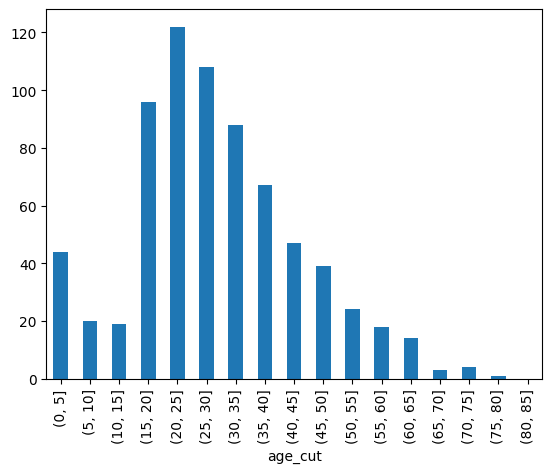

In [37]:
# let's plot value counts for age_cut sorted by index
titanic['age_cut'].value_counts().sort_index().plot(kind='bar')

<Axes: >

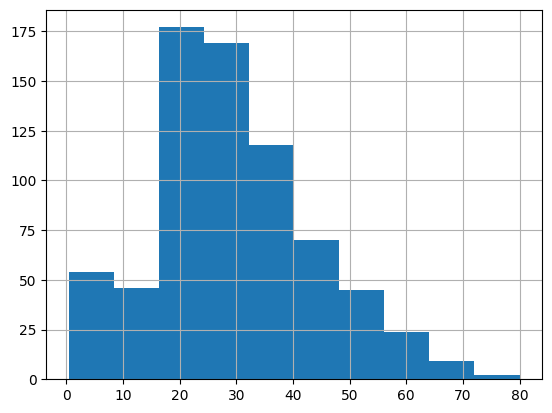

In [39]:
# we could do the same with pandas without calling seaborn
# pandas uses plain matplotlib by default
titanic['age'].hist()

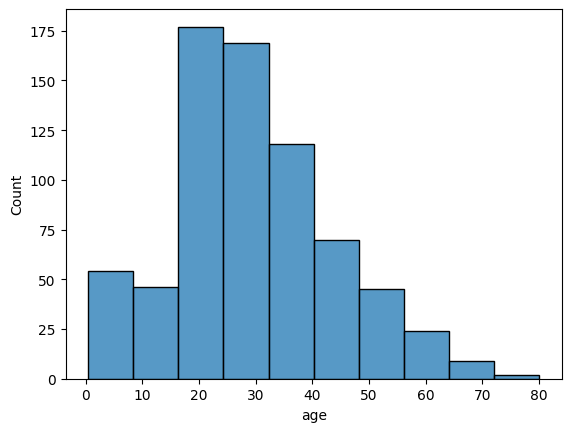

In [40]:
# let's try different bin size
sns.histplot(titanic['age'].dropna(), bins=10, kde=False);

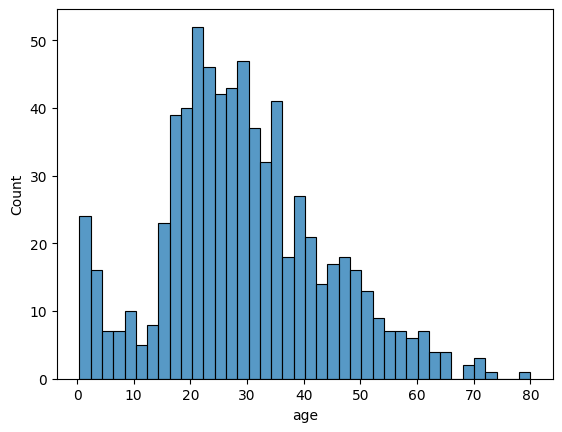

In [41]:
# how about 40 bins?
sns.histplot(titanic['age'].dropna(), bins=40, kde=False);

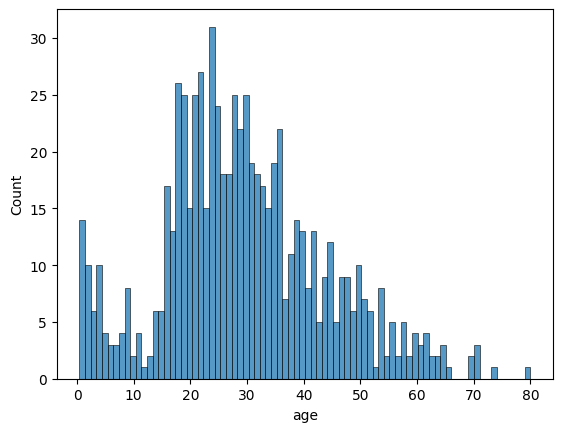

In [42]:
# how about 80 bins?
sns.histplot(titanic['age'].dropna(), bins=80, kde=False);

#### Density Plots

Density plots provide a smoothed estimate of the distribution.
They help visualize the shape of the distribution without binning artifacts.

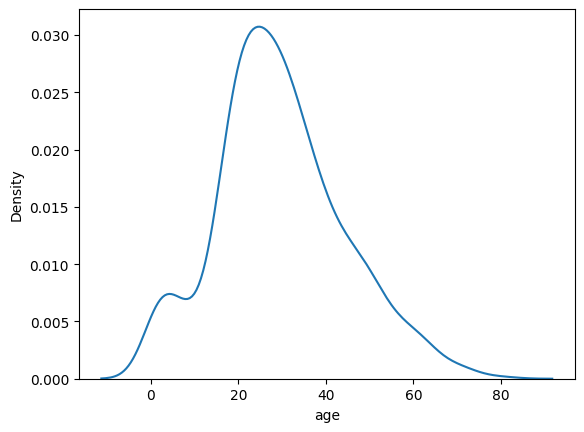

In [43]:
# simple kde plot of age column
sns.kdeplot(data=titanic, x='age');

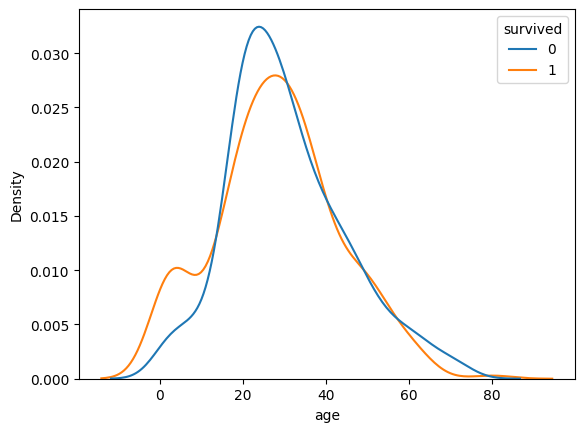

In [44]:
sns.kdeplot(data=titanic, x='age', hue='survived', common_norm=False); # here we see seaborn offering to color by another column

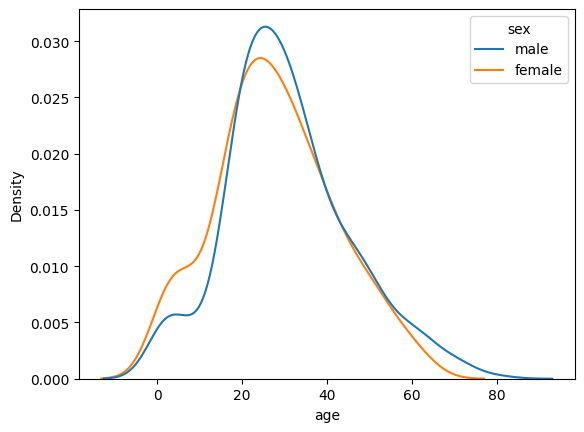

In [45]:
# how abour men versus women by age KDE ?
sns.kdeplot(data=titanic, x='age', hue='sex', common_norm=False);

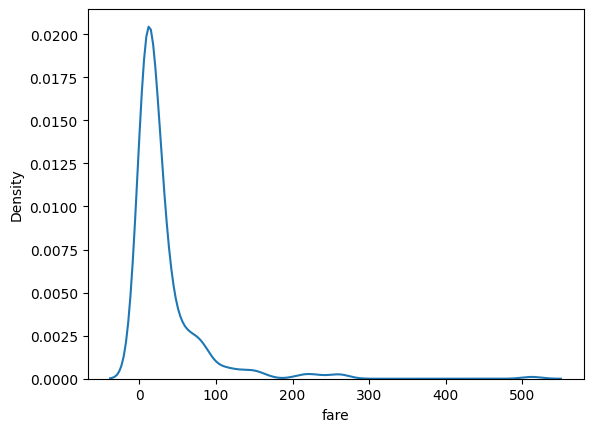

In [46]:
# let's plot KDE of fare column
sns.kdeplot(data=titanic, x='fare');

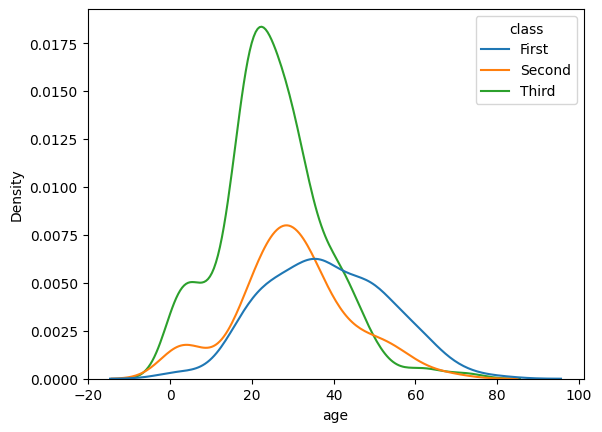

In [47]:
# let's plot kde for age with hue for pclass
sns.kdeplot(data=titanic, x='age', hue='class');

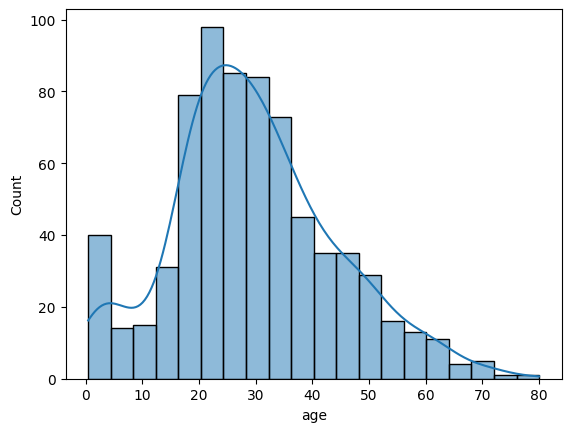

In [48]:
# let's plot age histogram together with KDE plot
sns.histplot(titanic['age'], kde=True); # so by not supplying bins we default to auto bins meaning seaborn algorithm will pick the number of bins for us

<Axes: xlabel='fare', ylabel='Count'>

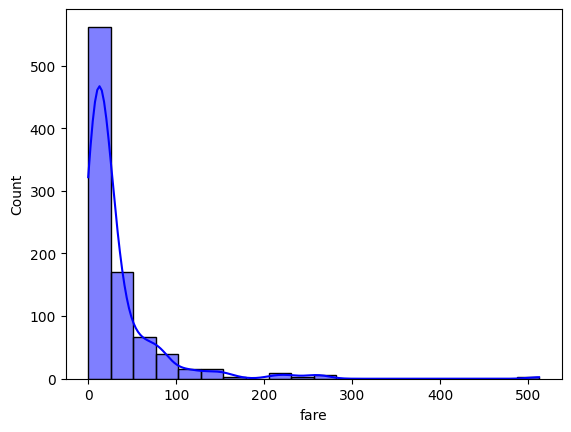

In [49]:
# so let's plot fare histogram including kde, use blue for histogram and red for kde
sns.histplot(titanic['fare'].dropna(), bins=20, kde=True, color='blue')
# we could have plotted two plots in same cell but here our output values are not automatically scaled kde vs histogram counts
# sns.histplot(titanic['fare'].dropna(), bins=20, kde=False, color='blue')
# sns.kdeplot(titanic['fare'].dropna(), color='red');


#### Boxplots

Boxplots summarize distributions and highlight outliers.
They show median, quartiles, and potential outliers in fare by passenger class.

<Axes: ylabel='fare'>

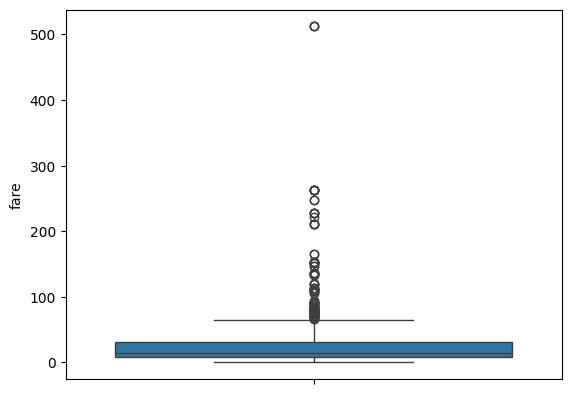

In [50]:
sns.boxplot(data=titanic, y="fare")

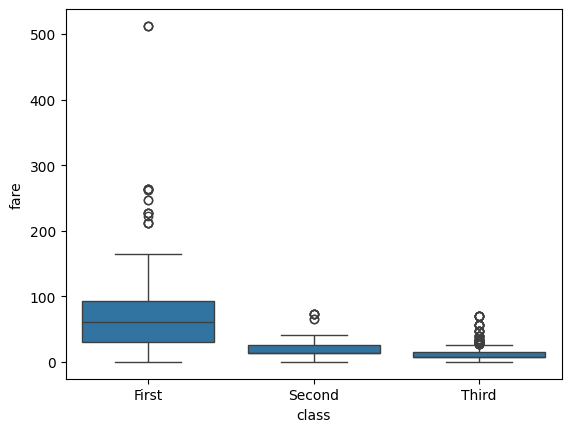

In [51]:
sns.boxplot(data=titanic, x='class', y='fare');

In [52]:
# let's print median, quartiles for fare by passenger class
titanic.groupby('class')['fare'].describe()

/tmp/ipython-input-471934291.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('class')['fare'].describe()


,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
First,216.00,84.15,78.38,0.00,30.92,60.29,93.50,512.33
Second,184.00,20.66,13.42,0.00,13.00,14.25,26.00,73.50
Third,491.00,13.68,11.78,0.00,7.75,8.05,15.50,69.55


In [ ]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [53]:
# let's group by class and embark_town and describe fares
titanic.groupby(['class', 'embark_town'])['fare'].describe()

/tmp/ipython-input-2912268945.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['class', 'embark_town'])['fare'].describe()


count   mean   std   min   25%   50%    75%    max
class  embark_town                                                    
First  Cherbourg    85.00 104.72 99.09 26.55 49.50 78.27 110.88 512.33
       Queenstown    2.00  90.00  0.00 90.00 90.00 90.00  90.00  90.00
       Southampton 127.00  70.36 58.81  0.00 29.25 52.00  83.47 263.00
Second Cherbourg    17.00  25.36 11.35 12.00 13.86 24.00  37.00  41.58
       Queenstown    3.00  12.35  0.00 12.35 12.35 12.35  12.35  12.35
       Southampton 164.00  20.33 13.63  0.00 13.00 13.50  26.00  73.50
Third  Cherbourg    66.00  11.21  4.87  4.01  7.23  7.90  14.46  22.36
       Queenstown   72.00  11.18  6.72  6.75  7.75  7.75  10.22  29.12
       Southampton 353.00  14.64 13.28  0.00  7.85  8.05  16.10  69.55

In [54]:
# let's group by passenger class, embark town and then sex and then describe fare
titanic.groupby(['class', 'embark_town', 'sex'])['fare'].describe()

/tmp/ipython-input-531607523.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['class', 'embark_town', 'sex'])['fare'].describe()


count   mean    std   min   25%   50%    75%    max
class  embark_town sex                                                        
First  Cherbourg   female  43.00 115.64  88.57 27.72 69.30 83.16 134.50 512.33
                   male    42.00  93.54 108.76 26.55 30.70 61.68 102.59 512.33
       Queenstown  female   1.00  90.00    NaN 90.00 90.00 90.00  90.00  90.00
                   male     1.00  90.00    NaN 90.00 90.00 90.00  90.00  90.00
       Southampton female  48.00  99.03  61.09 25.93 53.10 79.65 139.61 263.00
                   male    79.00  52.95  50.25  0.00 26.55 35.00  54.50 263.00
Second Cherbourg   female   7.00  25.27  12.88 12.00 13.82 24.00  35.83  41.58
                   male    10.00  25.42  10.88 12.88 15.05 25.86  35.27  41.58
       Queenstown  female   2.00  12.35   0.00 12.35 12.35 12.35  12.35  12.35
                   male     1.00  12.35    NaN 12.35 12.35 12.35  12.35  12.35
       Southampton female  67.00  21.91  10.76 10.50 13.00 23.00  26.00  65.00
                   male    97.00  19.23  15.26  0.00 11.50 13.00  26.00  73.50
Third  Cherbourg   female  23.00  14.69   4.47  7.22 13.94 14.46  17.50  22.36
                   male    43.00   9.35   4.01  4.01  7.22  7.23   8.69  21.68
       Queenstown  female  33.00  10.31   5.57  6.75  7.75  7.75   8.03  29.12
                   male    39.00  11.92   7.56  6.75  7.75  7.75  15.50  29.12
       Southampton female  88.00  18.67  13.72  7.25  8.51 14.45  24.48  69.55
                   male   265.00  13.31  12.88  0.00  7.80  8.05   9.85  69.55

In [55]:
titanic['class'].value_counts()

,count
class,
Third,491
First,216
Second,184


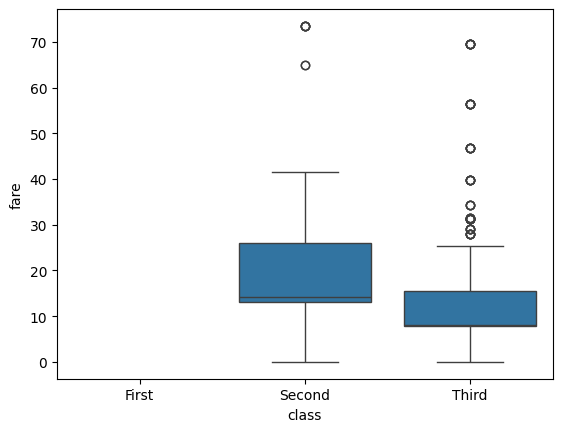

In [56]:
# so let's plot titanic fares in boxplot but only second and third class in class column
sns.boxplot(data=titanic[titanic['class'].isin(['Second', 'Third'])], x='class', y='fare');

### 3. Outlier Detection

#### Boxplots & Scatterplots

Boxplots and scatterplots help identify outliers in numerical data.
For instance, unusually high fares paid by some passengers.

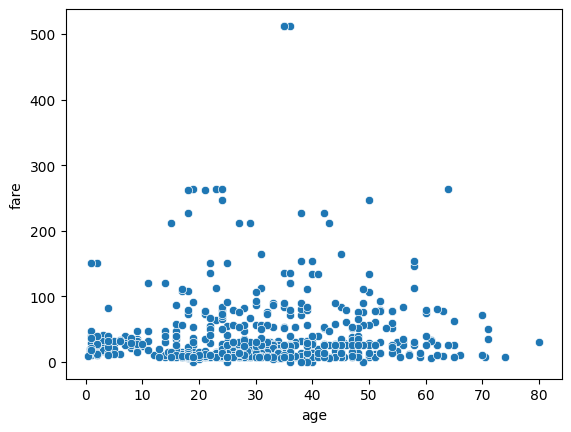

In [59]:
# simple scatterplot of age versus fare
# we simply pass the columns holding x and y values as paremeters to scatterplot function
sns.scatterplot(data=titanic, x='age', y='fare');


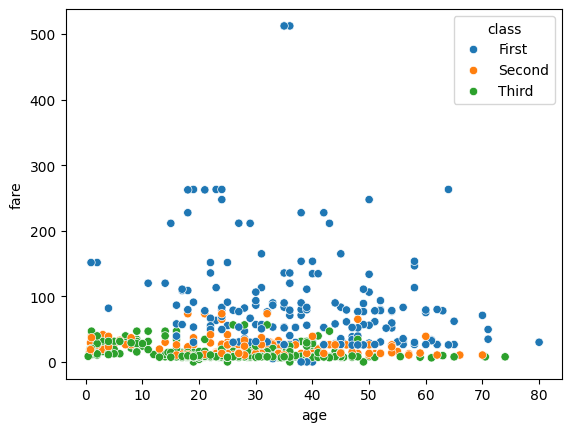

In [60]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='class');

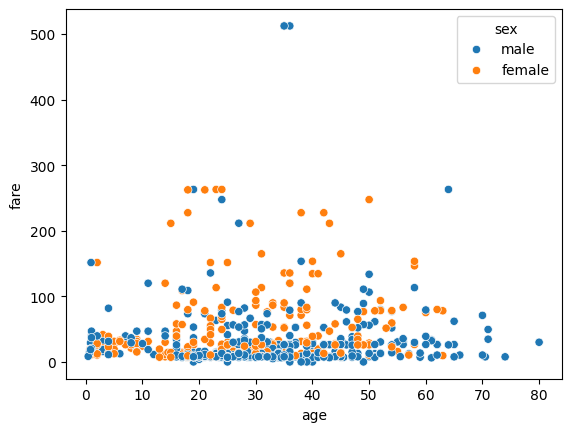

In [61]:
# so let's scatter plot fare versu age and hue would be sex
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex');

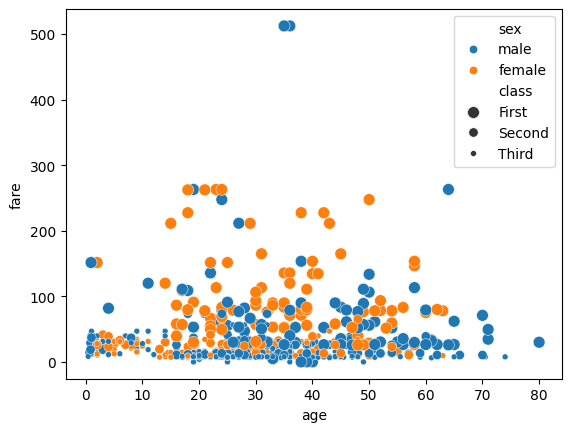

In [62]:
# let's scatter plot fare versus age and use sex for hue and class (1,2,3) for size
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex', size='class');

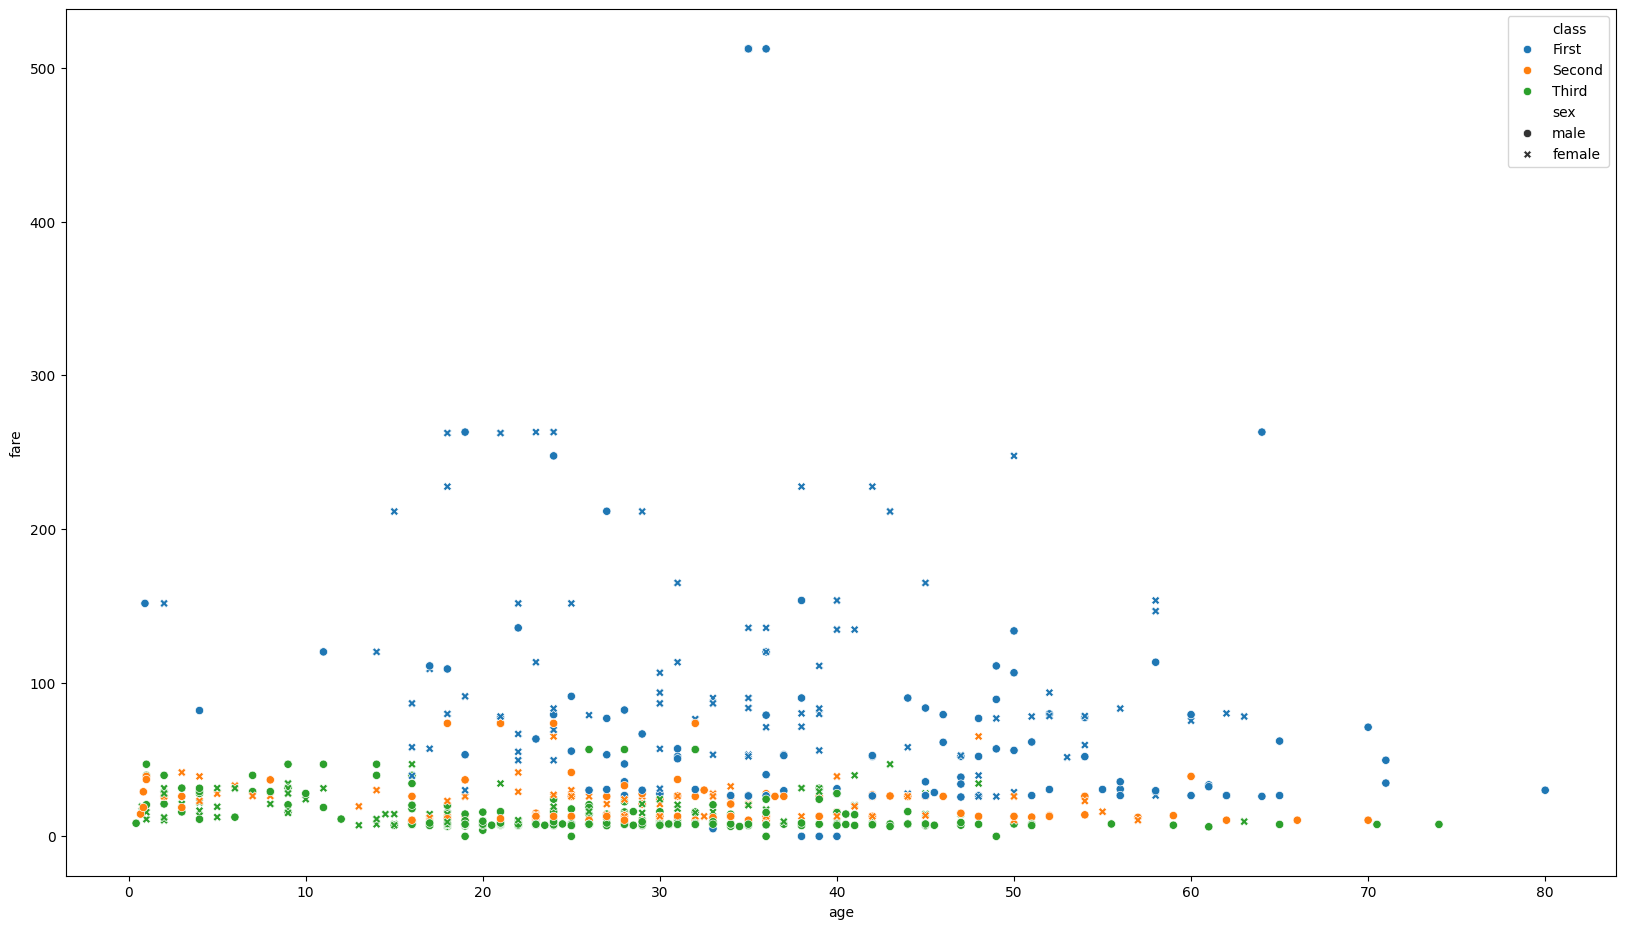

In [63]:
# how about plotting scatterplot of fare versus age, where hue is class, and different markers for male and female sex?
# sns.scatterplot(data=titanic, x='age', y='fare', hue='class', style='sex');
# let's save the plot, we should do it in same cell
# that the plot is in
# let's change size to 1920x1080
plt.figure(figsize=(1920/96, 1080/96))
sns.scatterplot(data=titanic, x='age', y='fare', hue='class', style='sex');
plt.savefig("titanic_age_fare_class_sex.png")
# TODO change image size before
# matplotlib offers various image saving options

In [64]:
# let's download the above picture from google colab to our local computer
from google.colab import files
files.download('titanic_age_fare_class_sex.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Filtering expensive tickets

In [65]:
# so let's see value counts by sex for fares over 100
titanic[titanic['fare'] > 100]['sex'].value_counts()

,count
sex,
female,34
male,19


### Utilizing multiple filters

In [66]:
# so how about value counts of fares over 100 only for ages between 18 and 30
titanic[(titanic['fare'] > 100) & (titanic['age'] >= 18) & (titanic['age'] <= 30)]['sex'].value_counts()
# above example shows how we can use multiple filters

,count
sex,
female,10
male,5


## Filtering and creating a copy of data

In [67]:
# i can save filtered data for separate analysis
# rich_young_adults = titanic[(titanic['fare'] > 100) & (titanic['age'] > 18) & (titanic['age'] < 30)] # this command would give you slice (not full copy of your date)
# if you know you do not have much data and you want to change it maybe then copy() at end would create your own data that you can modify without changing original
rich_young_adults = titanic[(titanic['fare'] > 100) & (titanic['age'] >= 18) & (titanic['age'] <= 30)].copy() # so in pandas we use .copy() to create explicit copy of some dataframe
# shape
print(f"Shape of rich_young_adults: {rich_young_adults.shape}")
rich_young_adults.sort_values(by="age")

Shape of rich_young_adults: (15, 16)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cut
311,1,1,female,18.00,2,2,262.38,C,First,woman,False,B,Cherbourg,yes,False,"(15, 20]"
505,0,1,male,18.00,1,0,108.90,C,First,man,True,C,Cherbourg,no,False,"(15, 20]"
700,1,1,female,18.00,1,0,227.53,C,First,woman,False,C,Cherbourg,yes,False,"(15, 20]"
27,0,1,male,19.00,3,2,263.00,S,First,man,True,C,Southampton,no,False,"(15, 20]"
742,1,1,female,21.00,2,2,262.38,C,First,woman,False,B,Cherbourg,yes,False,"(20, 25]"
708,1,1,female,22.00,0,0,151.55,S,First,woman,False,NaN,Southampton,yes,True,"(20, 25]"
373,0,1,male,22.00,0,0,135.63,C,First,man,True,NaN,Cherbourg,no,True,"(20, 25]"
88,1,1,female,23.00,3,2,263.00,S,First,woman,False,C,Southampton,yes,False,"(20, 25]"
393,1,1,female,23.00,1,0,113.28,C,First,woman,False,D,Cherbourg,yes,False,"(20, 25]"
118,0,1,male,24.00,0,1,247.52,C,First,man,True,B,Cherbourg,no,False,"(20, 25]"


In [68]:
# pandas also supports sql type queries
# so let's get rich young adults by making sql type queries on our dataframe
also_rich_young_adults = titanic.query("fare > 100 and age >= 18 and age <= 30")
# more on pandas queries docs: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html
# shape
print(f"Shape of also_rich_young_adults: {also_rich_young_adults.shape}")
also_rich_young_adults.sort_values(by="age")

Shape of also_rich_young_adults: (15, 16)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cut
311,1,1,female,18.00,2,2,262.38,C,First,woman,False,B,Cherbourg,yes,False,"(15, 20]"
505,0,1,male,18.00,1,0,108.90,C,First,man,True,C,Cherbourg,no,False,"(15, 20]"
700,1,1,female,18.00,1,0,227.53,C,First,woman,False,C,Cherbourg,yes,False,"(15, 20]"
27,0,1,male,19.00,3,2,263.00,S,First,man,True,C,Southampton,no,False,"(15, 20]"
742,1,1,female,21.00,2,2,262.38,C,First,woman,False,B,Cherbourg,yes,False,"(20, 25]"
708,1,1,female,22.00,0,0,151.55,S,First,woman,False,NaN,Southampton,yes,True,"(20, 25]"
373,0,1,male,22.00,0,0,135.63,C,First,man,True,NaN,Cherbourg,no,True,"(20, 25]"
88,1,1,female,23.00,3,2,263.00,S,First,woman,False,C,Southampton,yes,False,"(20, 25]"
393,1,1,female,23.00,1,0,113.28,C,First,woman,False,D,Cherbourg,yes,False,"(20, 25]"
118,0,1,male,24.00,0,1,247.52,C,First,man,True,B,Cherbourg,no,False,"(20, 25]"


## Comparing DataFrames

In [69]:
# let's check if the dataframes are identical
if rich_young_adults.equals(also_rich_young_adults):
  print("Dataframes are identical")
  # i could do something here like delete one of them
else:
  print("Dataframes are not identical")
  # i could do something here as well such as raise a warning

Dataframes are identical


In [70]:
# let's get count of survivors from our young rich adults
rich_young_adults['survived'].value_counts()

,count
survived,
1,9
0,6


#### IQR Method

The Interquartile Range (IQR) method identifies outliers as points below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.    

Definition of IQR: IQR = Q3 - Q1, where Q1 is the first quartile (25th percentile) and Q3 is the third quartile (75th percentile).
Wiki reference: https://en.wikipedia.org/wiki/Interquartile_range

![IQR](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/500px-Boxplot_vs_PDF.svg.png)

In [71]:

Q1 = titanic['fare'].quantile(0.25)
Q3 = titanic['fare'].quantile(0.75)
print(f"Q1 {Q1}")
print(f"Q3 {Q3}")
# simply calculate IQR by substracting Q3 from Q1
IQR = Q3 - Q1
print(f"IQR is {Q3} - {Q1} == {IQR} thus 1.5 IQR is {1.5*IQR}")

outliers = titanic[(titanic['fare'] < Q1 - 1.5*IQR) | (titanic['fare'] > Q3 + 1.5*IQR)] # note | in filter means OR
print("Outliers count:", len(outliers))


Q1 7.9104
Q3 31.0
IQR is 31.0 - 7.9104 == 23.0896 thus 1.5 IQR is 34.6344
Outliers count: 116


In [72]:
# so our outliers here would be all on the right side since we have no negatives
right_side_fare_outlier_limit = Q3 + 1.5*IQR
print(f"The right side limit for outliers by IQR method is: {right_side_fare_outlier_limit}")
# so in this case since we have nothing on left side (negative prices do not exist)
# we expect that right side filter would give us same results
titanic[titanic['fare'] > right_side_fare_outlier_limit].shape


The right side limit for outliers by IQR method is: 65.6344


(116, 16)

In [73]:
titanic['fare'].describe()

,fare
count,891.00
mean,32.20
std,49.69
min,0.00
25%,7.91
50%,14.45
75%,31.00
max,512.33


In [74]:
# so all outliers should be the expensive tickets, because we do no have any negative fares
# negative fares would mean - someone is paying you to take a trip...
# let's see the range of outliers
outliers['fare'].describe()

,fare
count,116.00
mean,128.29
std,84.64
min,66.60
25%,78.19
50%,90.00
75%,147.78
max,512.33


In [75]:
## Could check how did these outliers do on survival
outliers['survived'].value_counts(normalize=True)*100

,proportion
survived,
1,68.10
0,31.90


In [76]:
# how about overall survival as percentage
titanic['survived'].value_counts(normalize=True)*100

,proportion
survived,
0,61.62
1,38.38


### 4. Correlation Analysis

Correlation measures the strength and direction of relationships between numerical variables.
#### Correlation Matrix
A correlation matrix shows pairwise correlations between numerical variables.

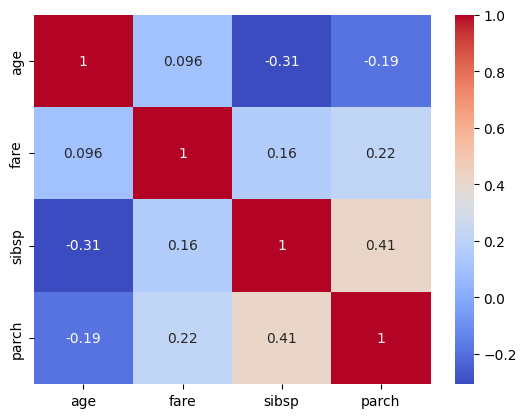

In [77]:

corr = titanic[['age','fare','sibsp','parch']].corr() # note the double square [[]] notation - essentially I am passing a list of columns
sns.heatmap(corr, annot=True, cmap='coolwarm'); # we can change cmap to other color schemes


### 5. Grouping & Aggregation

Grouping and aggregation summarize data by categories.

The `groupby` function in Pandas allows you to group data by one or more categorical variables and then apply aggregation functions (like mean, sum, count) to summarize the data within each group.

#### Similarity to SQL's GROUP BY
Pandas' `groupby` function is similar to SQL's `GROUP BY` clause, allowing aggregation of data based on categorical variables.

## Understanding `groupby` in Pandas

The `groupby` operation in **pandas** is one of the most powerful tools for summarizing and analyzing data.  
It works in three main steps, often described as **split–apply–combine**:

1. **Split** – The data is divided into groups based on one or more keys (columns).  
   Example: splitting Titanic passengers by `sex` or `class`.  

2. **Apply** – A function (such as `mean`, `sum`, `count`, `median`, `min`, `max`) is applied independently to each group.  
   Example: calculating the average fare for each class.  

3. **Combine** – The results of these operations are combined into a new DataFrame or Series.  
   Example: a summary table showing mean fares per class.

![https://www.w3resource.com/w3r_images/pandas-groupby-split-apply-combine.svg](https://www.w3resource.com/w3r_images/pandas-groupby-split-apply-combine.svg)

Src: https://www.w3resource.com/w3r_images/pandas-groupby-split-apply-combine.svg

### Why is `groupby` useful?
- It allows us to quickly compare groups (e.g., survival rates by sex).  
- It simplifies working with **aggregations across categories**.  
- It helps uncover patterns hidden in subsets of the data.  

### Example (Titanic dataset)
```python
# Average survival rate by sex
titanic.groupby("sex")["survived"].mean()

# Average fare and age by class
titanic.groupby("class")[["fare", "age"]].mean()


In [78]:

# Survival rates by sex
display(titanic.groupby('sex')['survived'].mean())
# display is for Pandas Dataframe objects (also Series)

# Multiple statistics on fares by class
# in this case we use agg function sand supply aggregation functions as list
titanic.groupby('class', observed=False)['fare'].agg(['min','mean','median','max','count'])


,survived
sex,
female,0.74
male,0.19


,min,mean,median,max,count
class,,,,,
First,0.00,84.15,60.29,512.33,216
Second,0.00,20.66,14.25,73.50,184
Third,0.00,13.68,8.05,69.55,491


In [79]:
# I can add also multiple grouping columns so lets use class and sex for groupby then agg
titanic.groupby(['class', 'sex'], observed=False)['fare'].agg(['mean','median','count'])

mean  median  count
class  sex                         
First  female 106.13   82.66     94
       male    67.23   41.26    122
Second female  21.97   22.00     76
       male    19.74   13.00    108
Third  female  16.12   12.47    144
       male    12.66    7.92    347

In [80]:
# we can save above table to excel
titanic.groupby(['class', 'sex'], observed=False)['fare'].agg(['mean','median','count']).to_excel('grouped_by_class_and_sex.xlsx')


In [81]:
# if I am on google colab I can download the xlsx file
from google.colab import files
files.download('grouped_by_class_and_sex.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [82]:
# let's gropy by class sex and alone columns and apply mean median count
titanic.groupby(['class', 'sex', 'alone'], observed=False)['fare'].agg(['mean','median','count'])

mean  median  count
class  sex    alone                      
First  female False 106.22   82.66     60
              True  105.96   81.58     34
       male   False 103.49   79.20     47
              True   44.50   30.00     75
Second female False  27.92   26.00     44
              True   13.79   13.00     32
       male   False  30.85   26.12     36
              True   14.19   13.00     72
Third  female False  21.75   18.00     84
              True    8.23    7.78     60
       male   False  22.69   18.00     83
              True    9.51    7.90    264

In [83]:
# # let's group by class sex and alone columns  and then calculate survived percentage
# show 4 digits after comma
pd.options.display.float_format = '{:.4f}'.format
titanic.groupby(['class', 'sex', 'alone'], observed=False)['survived'].agg(['mean','count'])

mean  count
class  sex    alone              
First  female False 0.9667     60
              True  0.9706     34
       male   False 0.4255     47
              True  0.3333     75
Second female False 0.9318     44
              True  0.9062     32
       male   False 0.2778     36
              True  0.0972     72
Third  female False 0.4167     84
              True  0.6167     60
       male   False 0.1807     83
              True  0.1212    264

## Pandas `pivot` – Reshaping Data for Better Insights

The `pivot` function in **pandas** reshapes data by turning unique values from one column into **new columns**, while using other columns for the index and the cell values.  
This is especially useful for creating **summary tables** that are easier to read and interpret.

### How it works
- **index** → the column to use as row labels.  
- **columns** → the column whose unique values become new column headers.  
- **values** → the column that fills the table cells.  

### Example with Titanic
Suppose we want to compare **average fares** by **class** and **sex**:

```python
pivot_table = titanic.pivot(
    index="class",
    columns="sex",
    values="fare"
)
print(pivot_table)


In [84]:
# Suppose we want to compare average fares by class and sex:
# We use pivot_table instead of pivot because there are multiple entries for each class and sex combination
pivot_table = pd.pivot_table(titanic, values='fare', index='class', columns='sex', aggfunc='mean')

# shape
print(f"Shape of pivot table: {pivot_table.shape}")
#
pivot_table.head()

Shape of pivot table: (3, 2)


/tmp/ipython-input-3269833511.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(titanic, values='fare', index='class', columns='sex', aggfunc='mean')


sex,female,male
class,,
First,106.1258,67.2261
Second,21.9701,19.7418
Third,16.1188,12.6616


In [85]:
# we could achieve same results with groupby
# so groupby class, sex and aggregate on fare using mean
titanic.groupby(['class', 'sex'], observed=False)['fare'].agg(['mean'])

mean
class  sex            
First  female 106.1258
       male    67.2261
Second female  21.9701
       male    19.7418
Third  female  16.1188
       male    12.6616

### Pivot Tables

Pivot tables provide a multi-dimensional summary of data, allowing you to aggregate and analyze data across multiple categorical variables simultaneously.

### Crosstab in Pandas

Crosstab is a specific type of pivot table that computes a simple cross-tabulation of two (or more) factors. It is often used to analyze the relationship between categorical variables.

#### Pandas `crosstab` – Quick Frequency Tables

The `crosstab` function in **pandas** is a fast way to compute **frequency tables** (counts or proportions) across two or more categorical variables.  
It is very similar to a pivot table, but it is **designed specifically for counting and cross-tabulation**.

#### How it works
- By default, `crosstab` counts the number of occurrences for each combination of categories.  
- You can also normalize (to show proportions) or apply other aggregation functions.

#### Example with Titanic
Count how many passengers survived by sex:

```python
pd.crosstab(titanic['sex'], titanic['survived'])


Below we analyze survival rates by passenger class and gender.



In [86]:
pd.crosstab(titanic['sex'], titanic['survived'])

survived,0,1
sex,,
female,81,233
male,468,109


In [88]:
# let's calculate crosstab for sex versus surived but let's get percentages of survivors
pd.crosstab(titanic['sex'], titanic['survived'], normalize='columns')

survived,0,1
sex,,
female,0.1475,0.6813
male,0.8525,0.3187


In [89]:

pd.crosstab(titanic['sex'], titanic['class'], values=titanic['survived'], aggfunc='mean')
# again by addint to_excel to generated DataFrame we could save it


class,First,Second,Third
sex,,,
female,0.9681,0.9211,0.5000
male,0.3689,0.1574,0.1354


In [90]:
# so if I want the above crosstab but want percentage then multiply end table by 100
pd.crosstab(titanic['sex'], titanic['class'], values=titanic['survived'], aggfunc='mean') * 100

class,First,Second,Third
sex,,,
female,96.8085,92.1053,50.0000
male,36.8852,15.7407,13.5447


In [91]:
# set option to show only 2 digits after comma
pd.options.display.float_format = '{:.2f}'.format
# if I want to round to 2 digits after comma in my crosstab
pd.crosstab(titanic['sex'], titanic['class'], values=titanic['survived'], aggfunc='mean').round(4)*100
# round actually changes values for cells by rounding up/down
# float_format is just a setting , it does not change data

class,First,Second,Third
sex,,,
female,96.81,92.11,50.00
male,36.89,15.74,13.54


### 6. Missing Data Analysis

#### Identifying Missing Data

We identify missing data using functions like `isnull()` and `sum()` in Pandas.



In [92]:
titanic.isnull().sum() # isnull is alias to isna

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


### 7. Chi-Squared Test for Categorical Variables

Chi-squared test assesses associations between categorical variables.

#### Chi-Squared Test Overview

- The Chi-squared test evaluates whether there is a significant association between two categorical variables.
- It compares observed frequencies in each category to the frequencies expected if there were no association.


#### Pandas `crosstab` and `chi2_contingency`

- We can use `pandas.crosstab` to create a contingency table of observed frequencies.
- The `scipy.stats.chi2_contingency` function performs the Chi-squared test on the contingency table.

#### Interpreting Chi-Squared Results

- The test returns a Chi-squared statistic, p-value, degrees of freedom, and expected frequencies.
- A low p-value (typically < 0.05) indicates a significant association between the variables.
#### Example

```python
import pandas as pd
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(df['embarked'], df['survived'])
# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared: {chi2}, p-value: {p}")
# Interpret results
if p < 0.05:
    print("Significant association between embarked port and survival.")
else:
    print("No significant association between embarked port and survival.")
```

More on Chi-squared test: https://en.wikipedia.org/wiki/Chi-squared_test

In [93]:
df = titanic # simply create an alias (NOT FULL COPY)
# for full copy I would use df = titanic.copy()
# import pandas as pd # no real need since we already imported
from scipy.stats import chi2_contingency # scipy is scientific python library
# Create a contingency table
contingency_table = pd.crosstab(df['embarked'], df['survived'])
contingency_table

survived,0,1
embarked,,
C,75,93
Q,47,30
S,427,217


In [94]:

# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared: {chi2}, p-value: {p}")
# Interpret results
if p < 0.05:
    print("Significant association between embarked port and survival.")
else:
    print("No significant association between embarked port and survival.")

Chi-squared: 26.48914983923762, p-value: 1.769922284120912e-06
Significant association between embarked port and survival.


In [95]:
# so let's see if there is association between sex and survived
contingency_table = pd.crosstab(df['sex'], df['survived'])
# Perform Chi-squared test
contingency_table

survived,0,1
sex,,
female,81,233
male,468,109


In [ ]:
# so let's see if there is association between sex and survived
contingency_table = pd.crosstab(df['sex'], df['survived'])
# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared: {chi2}, p-value: {p}")
# Interpret results
if p < 0.05:
    print("Significant association between sex and survival.")
else:
    print("No significant association between sex and survival.")

Chi-squared: 260.71702016732104, p-value: 1.1973570627755645e-58
Significant association between sex and survival.


In [96]:
# let's create a simple 2d dataframe 2x2 size with identical 50 in all 4 cells
df2 = pd.DataFrame({'A': [50, 50], 'B': [50, 50]})
df2

,A,B
0,50,50
1,50,50


In [98]:
# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(df2)
print(f"Chi-squared: {chi2}, p-value: {p}")
# Interpret results
if p < 0.05:
    print("Significant association between A and B.")
else:
    print("No significant association between A and B.")

Chi-squared: 0.0, p-value: 1.0
No significant association between A and B.


## Overview of our EDA

* So gather basics stats (simplest via describe)

In [99]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  age_cut      714 non-null    category
dtypes: bool(2), category(3), float64(2), int64(4), object(5)
memory usage: 82.3+ KB


In [100]:
# we could see only categorigal describe
titanic.describe(include='object') # so only object describe

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [101]:
# let's just use describe on ALL columns
titanic.describe(include='all') # so will use basic stats on numerical and object columns

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cut
count,891.00,891.00,891,714.00,891.00,891.00,891.00,889,891,891,891,203,889,891,891,714
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2,16
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True,"(20, 25]"
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537,122
mean,0.38,2.31,NaN,29.70,0.52,0.38,32.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.49,0.84,NaN,14.53,1.10,0.81,49.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.00,1.00,NaN,0.42,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.00,2.00,NaN,20.12,0.00,0.00,7.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.00,3.00,NaN,28.00,0.00,0.00,14.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.00,3.00,NaN,38.00,1.00,0.00,31.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# so let's divice top alive with total number
(891-549) / 891 # which matches our survived

0.3838383838383838

## Quick plot of all numerics versus each other

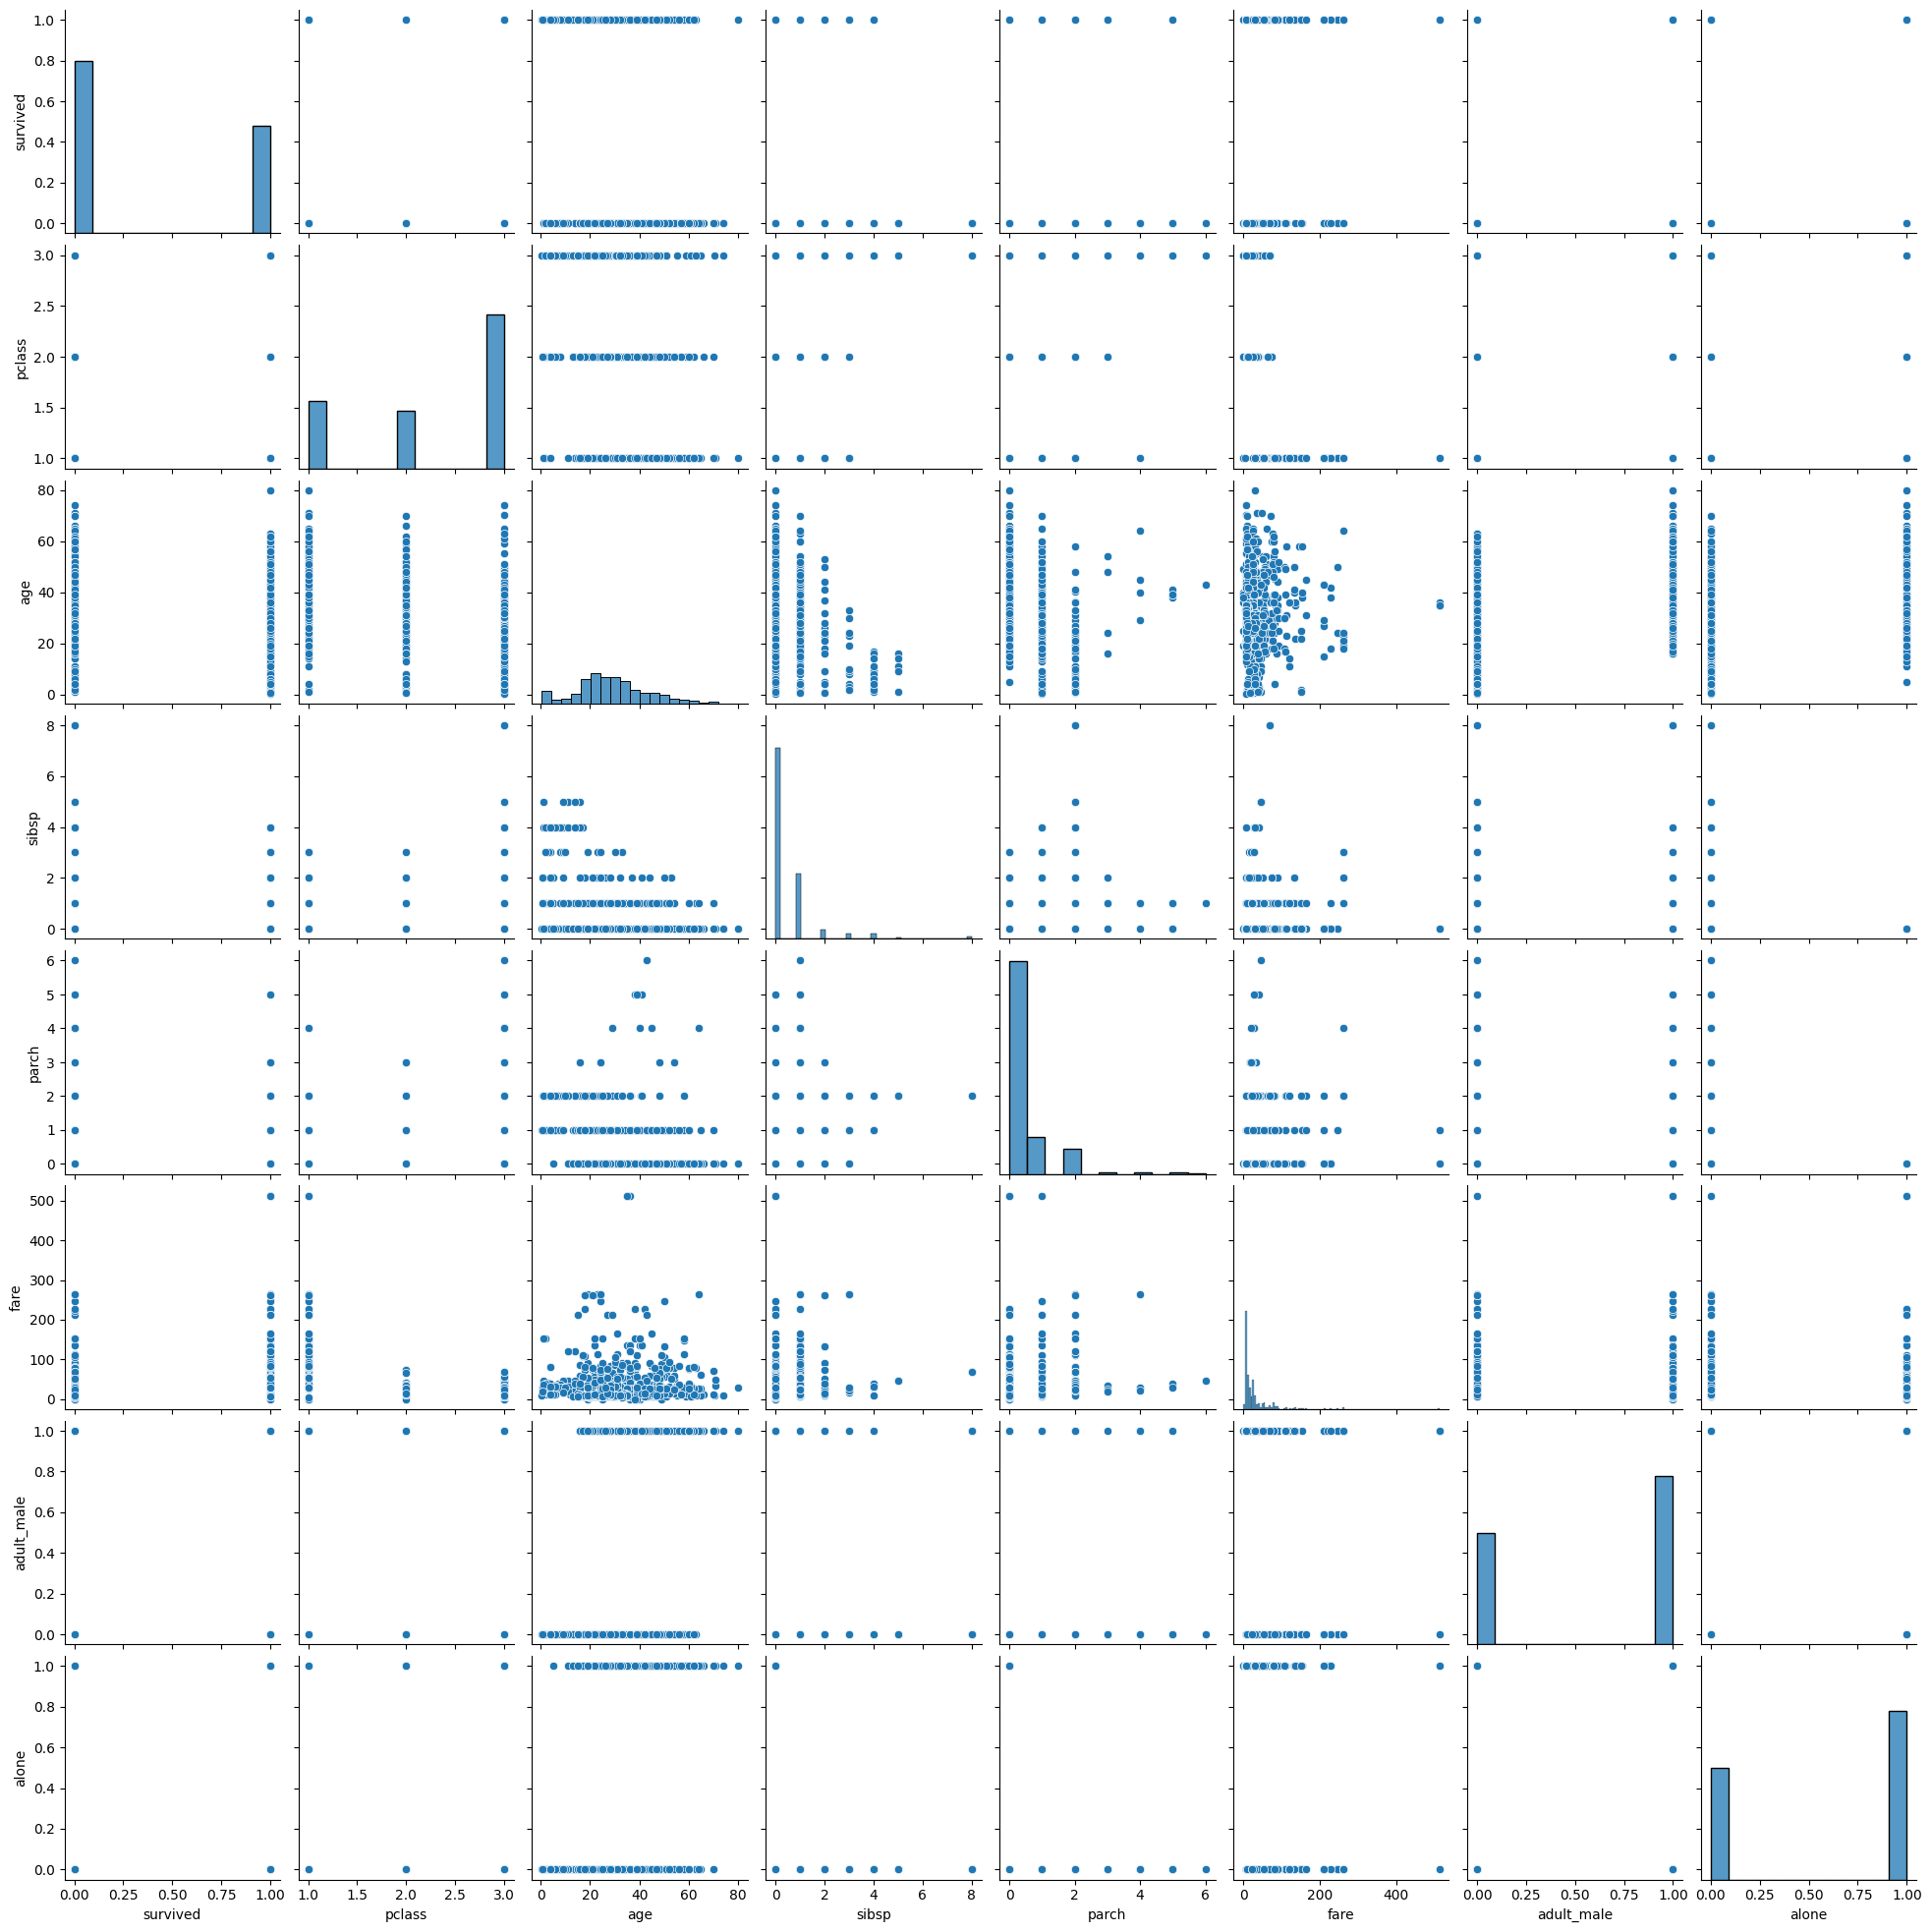

In [102]:
# so lets plot all numerics versus each other
sns.pairplot(titanic);

In [ ]:
# in our Titanic case our pairplots did not produce any significant new insights
# we had many numerics with few discrete values ( in effect categories hiding as numbers)

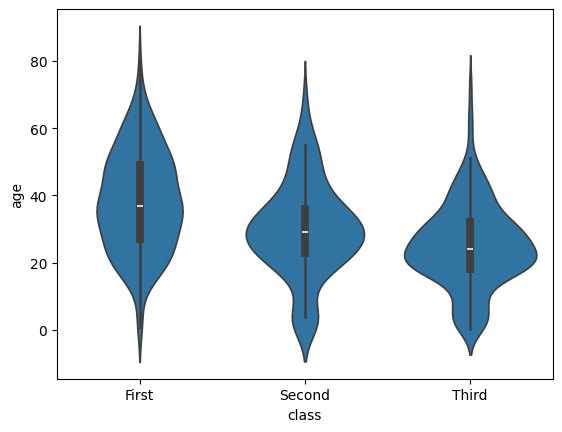

In [103]:
# let's plot violin plot of age by class
sns.violinplot(data=titanic, x='class', y='age');

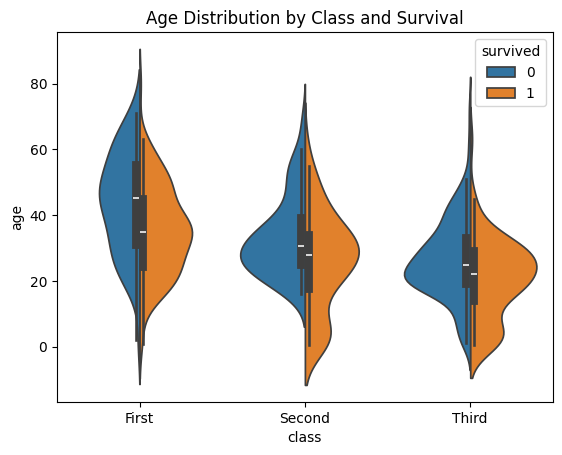

In [ ]:
# More descriptive plots using seaborn:

# 1. Violin plot of age by class and survival
# Shows the distribution of age for each class, split by survival status.
sns.violinplot(data=titanic, x='class', y='age', hue='survived', split=True)
plt.title('Age Distribution by Class and Survival')
plt.show()




/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 40.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 76.9% of the points cannot be placed

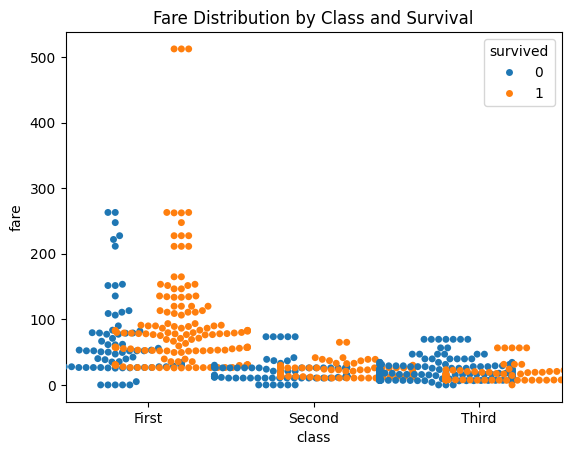

In [104]:
# 4. Swarmplot of fare by class and survival
# Shows the distribution of fare for each class, split by survival status, with individual data points.
sns.swarmplot(data=titanic, x='class', y='fare', hue='survived', dodge=True)
plt.title('Fare Distribution by Class and Survival')
plt.show()

## Swarm Plots

A swarm plot is a categorical scatterplot where the points are adjusted so that they don't overlap. This allows you to see the distribution of data within each category while also showing individual data points.

How Swarm Plots Work:

They position points along a categorical axis, similar to a stripplot.
Unlike a stripplot, they use a non-overlapping arrangement to show the density of points.
The points are "swarmed" or adjusted horizontally to avoid overlap, providing a clearer picture of the distribution.
Typical Use Cases for Swarm Plots:

Visualizing the distribution of a quantitative variable across different categories.
Showing the individual data points within each category, which can reveal clusters or gaps.
Comparing the distributions of multiple categories side-by-side.
Identifying potential outliers in the data.
Resources for learning more about swarm plots and data visualization:

Seaborn Documentation (Categorical Plots): [redacted link]
Seaborn swarmplot API Reference: [redacted link]
Matplotlib Documentation: [redacted link]
"Visualization of Categorical Data" section in the Seabor


## 📝 Exercise (30–45 min)

Using the Titanic dataset, complete the following tasks:

1. Compute survival rates by **embark_town** and **class**.  
2. Plot the age distribution for survivors vs non-survivors using **histograms** or **density plots**.  
3. Detect outliers in **age** using the IQR method and comment on findings.  
4. Create a new feature `family_size = sibsp + parch + 1`. Analyze its relationship with survival.  
5. Use a **pivot table** to display survival rates by **sex** and **class**. What patterns do you see?  
6. (Optional, for advanced) Perform a **chi-square test** on survival vs sex to test independence.  

### Fun - Plot the Datazaurus Dozen

Hint: Use Gemini code generate (or other LLM tool), it should provide an easy seaborn based recipe to plot your own Datazaurus dozen


In [105]:
# let's calculate survival by embark_town and class and also counts
survivors_by_town_class = df.groupby(['embark_town', 'class'], observed=False)['survived'].agg(['mean','count']) # we save our results of split-apply-combine into new dataframe that we call survivors_by_town_class
survivors_by_town_class

mean  count
embark_town class              
Cherbourg   First   0.69     85
            Second  0.53     17
            Third   0.38     66
Queenstown  First   0.50      2
            Second  0.67      3
            Third   0.38     72
Southampton First   0.58    127
            Second  0.46    164
            Third   0.19    353

In [106]:
# let's crate a pivot table with index being embark_town, columns being class and values being mean of survived
pivot_table = pd.pivot_table(df, values='survived', index='embark_town', columns='class', aggfunc='mean', observed=False)
display(pivot_table) # to display more than one DataFrame in same cell we use display for the earlier ones
pivot_table = pd.pivot_table(df, values='survived', index='embark_town', columns='class', aggfunc='count',observed=False)
pivot_table

class,First,Second,Third
embark_town,,,
Cherbourg,0.69,0.53,0.38
Queenstown,0.50,0.67,0.38
Southampton,0.58,0.46,0.19


class,First,Second,Third
embark_town,,,
Cherbourg,85,17,66
Queenstown,2,3,72
Southampton,127,164,353


In [107]:
# let's calculate survival by embark_town and class and sex
survivors_by_town_class_sex = df.groupby(['embark_town', 'class', 'sex'], observed=False)['survived'].agg(['mean','count'])
survivors_by_town_class_sex


mean  count
embark_town class  sex                
Cherbourg   First  female  0.98     43
                   male    0.40     42
            Second female  1.00      7
                   male    0.20     10
            Third  female  0.65     23
                   male    0.23     43
Queenstown  First  female  1.00      1
                   male    0.00      1
            Second female  1.00      2
                   male    0.00      1
            Third  female  0.73     33
                   male    0.08     39
Southampton First  female  0.96     48
                   male    0.35     79
            Second female  0.91     67
                   male    0.15     97
            Third  female  0.38     88
                   male    0.13    265

### Early conclusion and room for further research

We see that Third class survival was markedly different for Cherbourg and Queenstown versus Southampton.

What could explain this?

Is it caused by Southampton 3rd class taking worse seats? - TODO Research This

In [108]:
# lets add percentage survival column to our survival_by_town_count
survivors_by_town_class['survival_percentage'] = survivors_by_town_class['mean'] * 100
survivors_by_town_class

mean  count  survival_percentage
embark_town class                                   
Cherbourg   First   0.69     85                69.41
            Second  0.53     17                52.94
            Third   0.38     66                37.88
Queenstown  First   0.50      2                50.00
            Second  0.67      3                66.67
            Third   0.38     72                37.50
Southampton First   0.58    127                58.27
            Second  0.46    164                46.34
            Third   0.19    353                18.98

In [109]:
# let's round survival_percentage to two digits after comma
survivors_by_town_class['survival_percentage'] = survivors_by_town_class['survival_percentage'].round(2) # here we have lost the data in survival_percentage column, we only have up to 2 digits after comma(point in English)
survivors_by_town_class

mean  count  survival_percentage
embark_town class                                   
Cherbourg   First   0.69     85                69.41
            Second  0.53     17                52.94
            Third   0.38     66                37.88
Queenstown  First   0.50      2                50.00
            Second  0.67      3                66.67
            Third   0.38     72                37.50
Southampton First   0.58    127                58.27
            Second  0.46    164                46.34
            Third   0.19    353                18.98

In [110]:
# Pandas also offers option to display specific number of digits while still preserving the actual number of floating point precision
# command is something like pd.set_options
pd.options.display.float_format = '{:.4f}'.format # instead of 2 could have any other number of digits after comma for example '{:.4f}' for after comma
survivors_by_town_class

mean  count  survival_percentage
embark_town class                                    
Cherbourg   First  0.6941     85              69.4100
            Second 0.5294     17              52.9400
            Third  0.3788     66              37.8800
Queenstown  First  0.5000      2              50.0000
            Second 0.6667      3              66.6700
            Third  0.3750     72              37.5000
Southampton First  0.5827    127              58.2700
            Second 0.4634    164              46.3400
            Third  0.1898    353              18.9800

In [111]:
# let's set precision to 6
pd.options.display.float_format = '{:.6f}'.format
survivors_by_town_class

mean  count  survival_percentage
embark_town class                                      
Cherbourg   First  0.694118     85            69.410000
            Second 0.529412     17            52.940000
            Third  0.378788     66            37.880000
Queenstown  First  0.500000      2            50.000000
            Second 0.666667      3            66.670000
            Third  0.375000     72            37.500000
Southampton First  0.582677    127            58.270000
            Second 0.463415    164            46.340000
            Third  0.189802    353            18.980000

In [ ]:
# key difference is that float_format simply is for display formatting without data loss of precision
# while round(2) actually lost us some precision.

In [112]:
# let's save this on Colab
survivors_by_town_class.to_excel('survivors_by_town_class.xlsx')

In [113]:
# now download from colab to our computer
from google.colab import files
files.download('survivors_by_town_class.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [114]:
# let's save csv in colab
survivors_by_town_class.to_csv('survivors_by_town_class.csv')

### Plot the age distribution for survivors vs non-survivors using histograms or density plots.

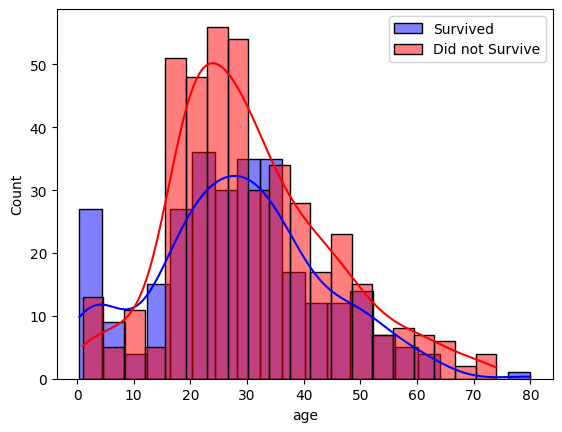

In [115]:
# Plot the age distribution for survivors vs non-survivors using histograms AND density plots.
sns.histplot(titanic[titanic['survived'] == 1]['age'].dropna(), bins=20, kde=True, color='blue', label='Survived')
sns.histplot(titanic[titanic['survived'] == 0]['age'].dropna(), bins=20, kde=True, color='red', label='Did not Survive')
# show labels
plt.legend()
# we can also save the image to storage (png, pdf, svg, and other formats are available)
# we use matplotlib directly (because Seaborn is wrapper around matplotlib)
plt.savefig('age_distribution.png')
# documentation on savefig  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

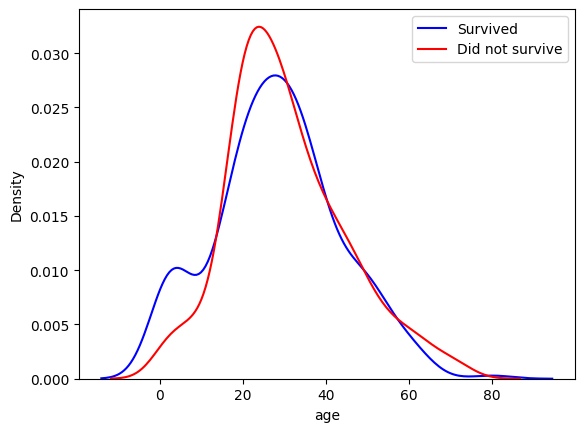

In [116]:
# let's just plot kde plots only for both survivors in blue and non survivors in red.
sns.kdeplot(titanic[titanic['survived'] == 1]['age'].dropna(), color='blue', label='Survived')
sns.kdeplot(titanic[titanic['survived'] == 0]['age'].dropna(), color='red', label='Did not survive')
# show labels
plt.legend()


<Axes: xlabel='age', ylabel='survived'>

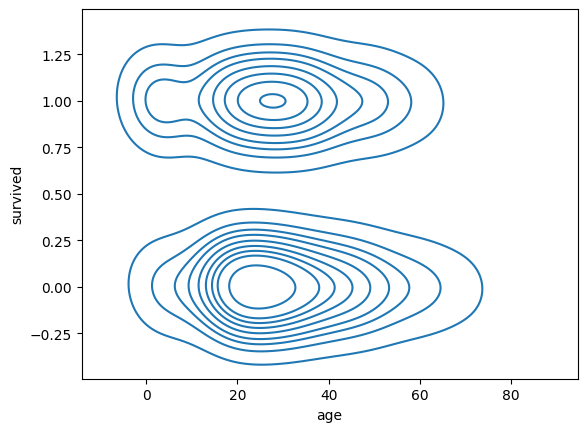

In [117]:
# les ploat age
sns.kdeplot(data=titanic, x='age', y='survived')

<Axes: xlabel='age', ylabel='survived'>

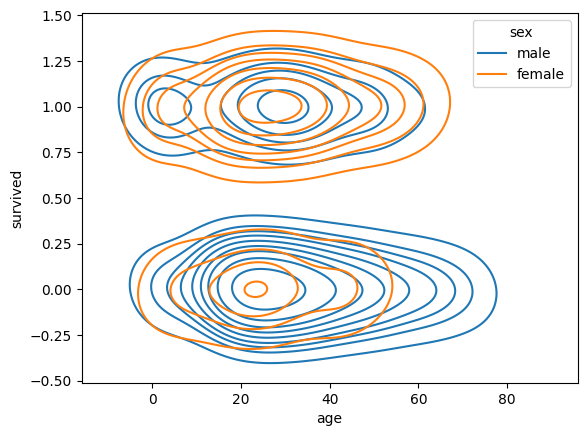

In [118]:
# let's plot KDE plots for survived column by age and sex so this means four plots
sns.kdeplot(data=titanic, x='age', y='survived', hue='sex')

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.250000,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.283300,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.925000,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.100000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.050000,S,Third,man,True,NaN,Southampton,no,True


### Detect outliers in age using the IQR method

In [119]:
# Detect outliers in age using the IQR method
Q1 = titanic['age'].quantile(0.25)
Q3 = titanic['age'].quantile(0.75)
print(f"Q1 {Q1}")
print(f"Q3 {Q3}")
IQR = Q3 - Q1
print(f"IQR is {IQR} so 1.5*IQR is {1.5*IQR}")
outliers = titanic[(titanic['age'] < Q1 - 1.5*IQR) | (titanic['age'] > Q3 + 1.5*IQR)] # | in filter works like OR
# just like & is for AND in filters
print("Outliers count:", len(outliers))

Q1 20.125
Q3 38.0
IQR is 17.875 so 1.5*IQR is 26.8125
Outliers count: 11


In [120]:
# so let's check how many passangers are total
# and how many passangers are between Q1 and Q3 (we expect roughly half)
print("Total count:", len(titanic))
print("Count between Q1 and Q3:", len(titanic[(titanic['age'] >= Q1) & (titanic['age'] <= Q3)]))

# TODO why is it not exactly half?

Total count: 891
Count between Q1 and Q3: 358


In [121]:
# so we looked for Q1 - 1.5*IQR
print(f"We filtered for values either less than {Q1 - 1.5*IQR}")
# or we looked for Q3 + 1.5*IQR
print(f"We filtered for values either greater than {Q3 + 1.5*IQR}")

We filtered for values either less than -6.6875
We filtered for values either greater than 64.8125


In [122]:
# so we can manually check for this value of older age 64.8125
older_folks = titanic[titanic['age'] > 64.8125]
# disadvantage of hand entered "magical values" is that if we get a different dataset we need to calculate it by hand again...
# shape of older folks
print(f"Shape of older folks: {older_folks.shape}")
# older_folks.sort_values(by='age', ascending=False)
# let's sort by age in ascending and pclass in descending
older_folks.sort_values(by=['age', 'pclass','fare'], ascending=[True, False,False]) # if I wanted older_folks modified I would add inplace=True parameter
# this means we sort by age first in ascending
# any tiebreaks are resolved by sorting those in descending order by pclass
# you can have as mnay sort_value columns as you want
# finally if we still have tiebreaks
# we sort those by fare in descending order
# if we wanted wanted to save this sorted dataframe
# we could simply overwrite previous one by
# older_folks = older_folks.sort_values(by=['age', 'pclass','fare'], ascending=[True, False,False])
# or I could create a copy
# older_folks_sorted = older_folks.sort_values(by=['age', 'pclass','fare'], ascending=[True, False,False]).copy()

Shape of older folks: (11, 16)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cut
280,0,3,male,65.000000,0,0,7.750000,Q,Third,man,True,NaN,Queenstown,no,True,"(60, 65]"
54,0,1,male,65.000000,0,1,61.979200,C,First,man,True,B,Cherbourg,no,False,"(60, 65]"
456,0,1,male,65.000000,0,0,26.550000,S,First,man,True,E,Southampton,no,True,"(60, 65]"
33,0,2,male,66.000000,0,0,10.500000,S,Second,man,True,NaN,Southampton,no,True,"(65, 70]"
672,0,2,male,70.000000,0,0,10.500000,S,Second,man,True,NaN,Southampton,no,True,"(65, 70]"
745,0,1,male,70.000000,1,1,71.000000,S,First,man,True,B,Southampton,no,False,"(65, 70]"
116,0,3,male,70.500000,0,0,7.750000,Q,Third,man,True,NaN,Queenstown,no,True,"(70, 75]"
493,0,1,male,71.000000,0,0,49.504200,C,First,man,True,NaN,Cherbourg,no,True,"(70, 75]"
96,0,1,male,71.000000,0,0,34.654200,C,First,man,True,A,Cherbourg,no,True,"(70, 75]"
851,0,3,male,74.000000,0,0,7.775000,S,Third,man,True,NaN,Southampton,no,True,"(70, 75]"


### Create a new feature family_size = sibsp + parch + 1. Analyze its relationship with survival.

In [123]:
# Create a new feature family_size = sibsp + parch + 1.
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1 # so 1 represents yourself
# of course this means about the ship family size, not what you left behind
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cut,family_size
0,0,3,male,22.000000,1,0,7.250000,S,Third,man,True,NaN,Southampton,no,False,"(20, 25]",2
1,1,1,female,38.000000,1,0,71.283300,C,First,woman,False,C,Cherbourg,yes,False,"(35, 40]",2
2,1,3,female,26.000000,0,0,7.925000,S,Third,woman,False,NaN,Southampton,yes,True,"(25, 30]",1
3,1,1,female,35.000000,1,0,53.100000,S,First,woman,False,C,Southampton,yes,False,"(30, 35]",2
4,0,3,male,35.000000,0,0,8.050000,S,Third,man,True,NaN,Southampton,no,True,"(30, 35]",1


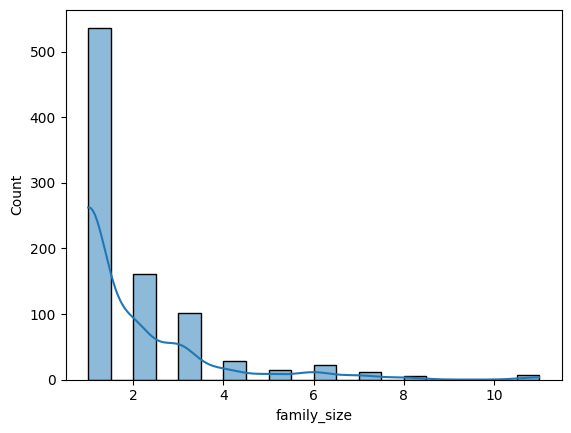

In [124]:
# let's see histogram of family_size
sns.histplot(titanic['family_size'], bins=20, kde=True);

In [125]:
# we could also check value counts
titanic['family_size'].value_counts()

,count
family_size,
1,537
2,161
3,102
4,29
6,22
5,15
7,12
11,7
8,6


In [126]:
# let's order family_size value counts by family_size
titanic['family_size'].value_counts().sort_index()

,count
family_size,
1,537
2,161
3,102
4,29
5,15
6,22
7,12
8,6
11,7


In [127]:
#  Analyze family size relationship with survival.
titanic.groupby('family_size')['survived'].mean() # if I only have one aggregation function I can call it immediately

,survived
family_size,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [128]:
# let's group by family_size and calculate mean survived and also count
titanic.groupby('family_size')['survived'].agg(['mean','count']) #if I have more than one aggregation function I put them inside agg()

,mean,count
family_size,,
1,0.303538,537
2,0.552795,161
3,0.578431,102
4,0.724138,29
5,0.200000,15
6,0.136364,22
7,0.333333,12
8,0.000000,6
11,0.000000,7


In [ ]:
# so first conclusions
# loners had bad survival over small family units
# truly large families perished but those were only few data points - not really enough to draw conclusions

### Use a pivot table to display survival rates by sex and class. What patterns do you see?*italicized text*

In [129]:
# Use a pivot table to display survival rates by sex and class.
pivot_gender_class = pd.pivot_table(titanic, values='survived', index='sex', columns='class', aggfunc='mean')
pivot_gender_class

/tmp/ipython-input-4096125812.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_gender_class = pd.pivot_table(titanic, values='survived', index='sex', columns='class', aggfunc='mean')


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [130]:
# let's multiply ALL cells by 100
pivot_gender_class = pivot_gender_class * 100
# round to 2 digits after comma
pivot_gender_class = pivot_gender_class.round(2) # applies to ALL cells
pivot_gender_class

class,First,Second,Third
sex,,,
female,96.810000,92.110000,50.000000
male,36.890000,15.740000,13.540000


In [131]:
# so again first and second class female passangers had exceptional survival rations
# we can save this table as well
pivot_gender_class.to_excel('pivot_gender_class.xlsx')

In [132]:
# let's create a pivot table for who column being index versus class column and values would be survived column and we would apply mean function
pivot_who_class = pd.pivot_table(titanic, values='survived', index='who', columns='class', aggfunc='mean')
pivot_who_class

/tmp/ipython-input-863761644.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_who_class = pd.pivot_table(titanic, values='survived', index='who', columns='class', aggfunc='mean')


class,First,Second,Third
who,,,
child,0.833333,1.000000,0.431034
man,0.352941,0.080808,0.119122
woman,0.978022,0.909091,0.491228


In [133]:
# let's do group by who then class and use describe for aggregration.
# titanic.groupby(['who', 'class'])['survived'].describe()
titanic.groupby(['who', 'class'])['survived'].agg(['mean','count'])

/tmp/ipython-input-3516093143.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['who', 'class'])['survived'].agg(['mean','count'])


mean  count
who   class                 
child First  0.833333      6
      Second 1.000000     19
      Third  0.431034     58
man   First  0.352941    119
      Second 0.080808     99
      Third  0.119122    319
woman First  0.978022     91
      Second 0.909091     66
      Third  0.491228    114

### Perform a chi-square test on survival vs sex to test independence.

In [134]:
# Perform a chi-square test on survival vs sex to test independence.
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(titanic['sex'], titanic['survived'])
contingency_table

survived,0,1
sex,,
female,81,233
male,468,109


In [135]:

# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared: {chi2}, p-value: {p}")
# Interpret results
if p < 0.05:
    print("Significant association between sex and survival.")
else:
    print("No significant association between sex and survival.")

Chi-squared: 260.71702016732104, p-value: 1.1973570627755645e-58
Significant association between sex and survival.


In [136]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cut,family_size
0,0,3,male,22.000000,1,0,7.250000,S,Third,man,True,NaN,Southampton,no,False,"(20, 25]",2
1,1,1,female,38.000000,1,0,71.283300,C,First,woman,False,C,Cherbourg,yes,False,"(35, 40]",2
2,1,3,female,26.000000,0,0,7.925000,S,Third,woman,False,NaN,Southampton,yes,True,"(25, 30]",1
3,1,1,female,35.000000,1,0,53.100000,S,First,woman,False,C,Southampton,yes,False,"(30, 35]",2
4,0,3,male,35.000000,0,0,8.050000,S,Third,man,True,NaN,Southampton,no,True,"(30, 35]",1


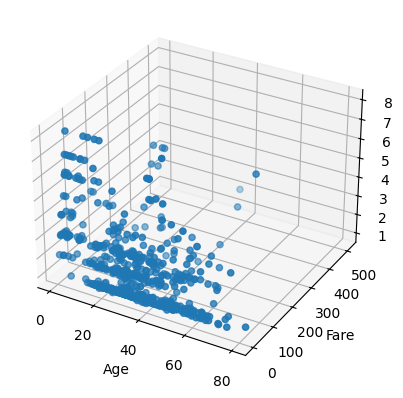

In [137]:
# let's create a 3d plot where x is age, y is fare, and z is family_size
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(titanic['age'], titanic['fare'], titanic['family_size'])
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Family Size')
# we can save any plot with plt.save
plt.savefig("plot3d.png")
plt.show()

## Plotting Datasaurus Dozen

In [138]:
# let's get list of available datasets
datasets_list = sns.get_dataset_names()
datasets_list
# from https://seaborn.pydata.org/generated/seaborn.get_dataset_names.html#seaborn.get_dataset_names

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [139]:
# TODO find
# let's first import Dinosaurus Dozen data from sns
# so challenge is to find an url which stores the dataset
# then we could use Day 2 downloader example to download the data directly
# if we have csv we could use pd.read_csv
# if we hav xlsx we could pd.read_excel
# if we have zip we would have to download (with code or hand) and unzip (with code or hand)
# thanks Normunds for
# https://medium.com/@marc.bolle/datasaurus-dozen-visualization-using-python-d328dad64d20 see here
tsv_url = "https://raw.githubusercontent.com/jumpingrivers/datasauRus/main/inst/extdata/DatasaurusDozen-Long.tsv"
# let's load this tsv
df_dino = pd.read_csv(tsv_url, sep='\t')
df_dino.sample(10, random_state=2025)


,dataset,x,y
602,x_shape,47.142789,32.025064
828,star,38.764279,14.365590
34,dino,45.384600,36.410300
887,high_lines,37.555116,24.537664
1009,dots,27.878264,50.708908
690,x_shape,34.238110,13.713158
399,h_lines,42.713194,10.487547
549,v_lines,50.352261,12.468601
842,star,76.822304,15.595165
725,star,27.186464,63.558730


In [140]:
# let's see the value counts for dataset
df_dino['dataset'].value_counts()

,count
dataset,
dino,142
away,142
h_lines,142
v_lines,142
x_shape,142
star,142
high_lines,142
dots,142
circle,142


Text(0.5, 0.98, 'Datazaurus Dozen')

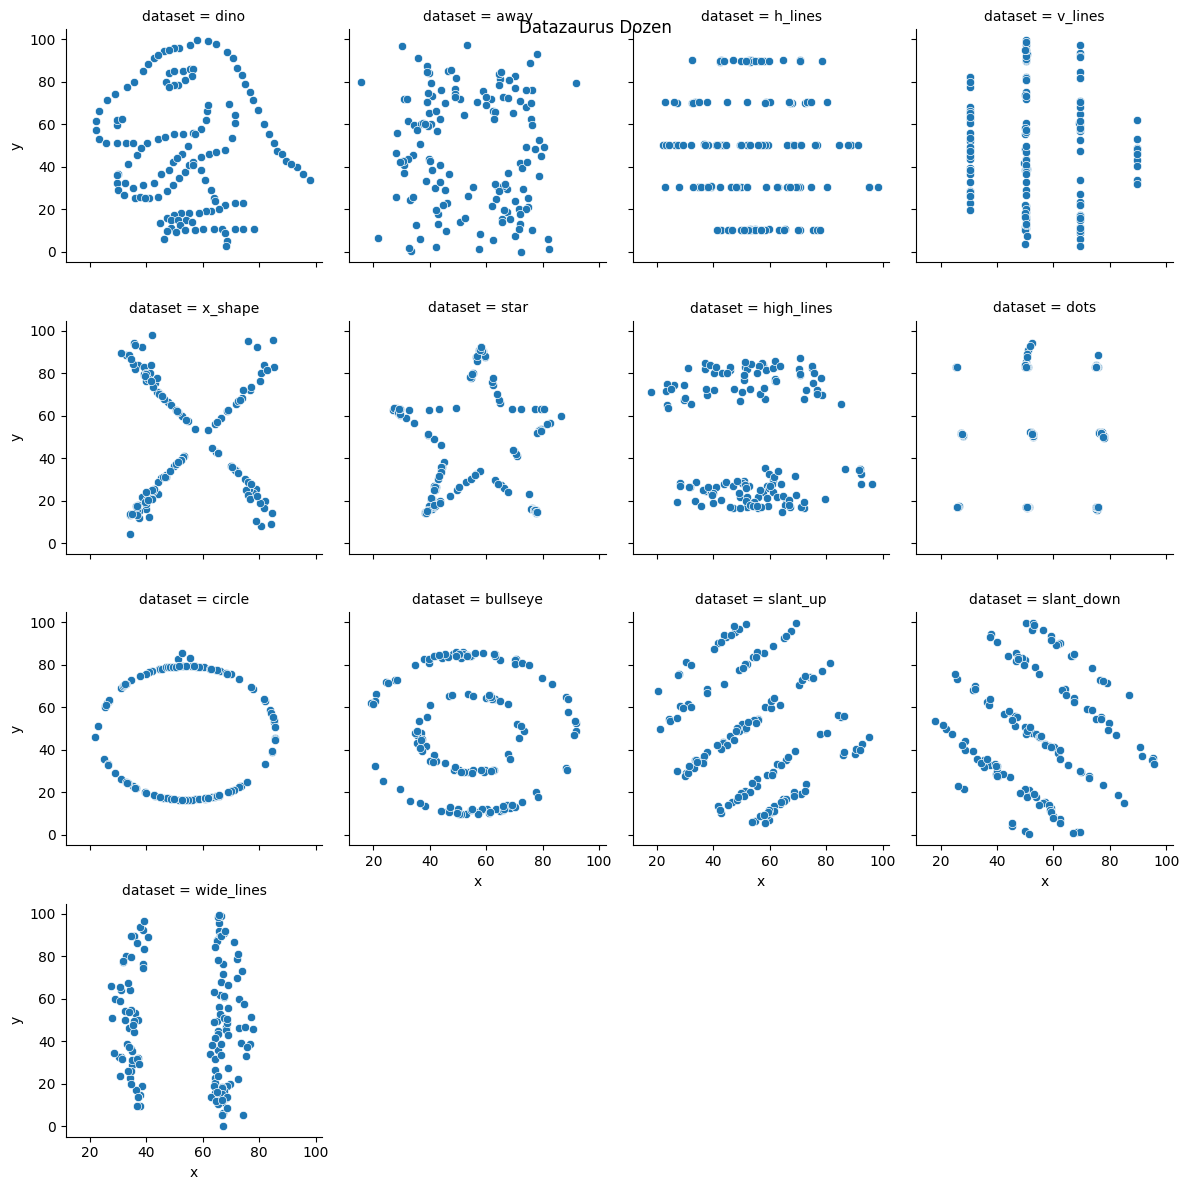

In [141]:
# so lets plost all the dinos using scatterplot
# we can use Seaborn FacetGrid
# we want 4 column grid
g = sns.FacetGrid(df_dino, col="dataset", col_wrap=4)
g.map(sns.scatterplot, "x", "y")
# let's add title "Datazaurus Dozen"
g.fig.suptitle("Datazaurus Dozen") # we could have moved this up a bit


In [142]:
# lets group by dataset and describe the groups
df_dino.groupby('dataset').describe()

x                                                    \
                count      mean       std       min       25%       50%   
dataset                                                                   
away       142.000000 54.266100 16.769825 15.560750 39.724115 53.340296   
bullseye   142.000000 54.268730 16.769239 19.288205 41.627968 53.842088   
circle     142.000000 54.267320 16.760013 21.863581 43.379116 54.023213   
dino       142.000000 54.263273 16.765142 22.307700 44.102600 53.333300   
dots       142.000000 54.260303 16.767735 25.443526 50.359707 50.976768   
h_lines    142.000000 54.261442 16.765898 22.003709 42.293828 53.069678   
high_lines 142.000000 54.268805 16.766704 17.893499 41.535981 54.168689   
slant_down 142.000000 54.267849 16.766759 18.109472 42.890931 53.135159   
slant_up   142.000000 54.265882 16.768853 20.209778 42.810866 54.261345   
star       142.000000 54.267341 16.768959 27.024603 41.034210 56.534732   
v_lines    142.000000 54.269927 16.769959 30.449654 49.964506 50.362890   
wide_lines 142.000000 54.266916 16.770000 27.439632 35.522449 64.550226   
x_shape    142.000000 54.260150 16.769958 31.106867 40.091656 47.136458   

                                        y                                \
                 75%       max      count      mean       std       min   
dataset                                                                   
away       69.146597 91.639961 142.000000 47.834721 26.939743  0.015119   
bullseye   64.798900 91.735539 142.000000 47.830823 26.935727  9.691547   
circle     64.972672 85.664761 142.000000 47.837717 26.930036 16.326546   
dino       64.743600 98.205100 142.000000 47.832253 26.935403  2.948700   
dots       75.197363 77.954435 142.000000 47.839829 26.930192 15.771892   
h_lines    66.768274 98.288123 142.000000 47.830252 26.939876 10.463915   
high_lines 63.952667 96.080519 142.000000 47.835450 26.939998 14.913962   
slant_down 64.469989 95.593416 142.000000 47.835896 26.936105  0.303872   
slant_up   64.488010 95.260528 142.000000 47.831496 26.938608  5.645777   
star       68.711493 86.435897 142.000000 47.839545 26.930275 14.365590   
v_lines    69.504068 89.504851 142.000000 47.836988 26.937684  2.734760   
wide_lines 67.453672 77.915874 142.000000 47.831602 26.937902  0.217006   
x_shape    71.856923 85.446186 142.000000 47.839717 26.930002  4.577661   

                                                    
                 25%       50%       75%       max  
dataset                                             
away       24.625892 47.535269 71.803148 97.475771  
bullseye   26.244735 47.382937 72.532852 85.876229  
circle     18.349610 51.025022 77.782382 85.578134  
dino       25.288450 46.025600 68.525675 99.487200  
dots       17.107141 51.299291 82.881589 94.249328  
h_lines    30.479911 50.473527 70.349471 90.458936  
high_lines 22.920843 32.499203 75.940022 87.152208  
slant_down 27.840858 46.401314 68.439430 99.644179  
slant_up   24.756248 45.292238 70.855844 99.579591  
star       20.374135 50.110554 63.548584 92.214989  
v_lines    22.752884 47.113616 65.845391 99.694680  
wide_lines 24.346941 46.279331 67.568127 99.283764  
x_shape    23.470809 39.876211 73.609634 97.837615

In [143]:
# let's split the df_dino into multiple dataframes bases on dataset column
# first let's get unique values in dataset
unique_datasets = df_dino['dataset'].unique()
unique_datasets


array(['dino', 'away', 'h_lines', 'v_lines', 'x_shape', 'star',
       'high_lines', 'dots', 'circle', 'bullseye', 'slant_up',
       'slant_down', 'wide_lines'], dtype=object)

In [144]:
# let us import tqdm for progress bar - just cosmetics
from tqdm import tqdm # this is external library for progress bar

In [145]:
# so let's go through unique_dataset values one by one and create new dataframe filtered by that unique_dataset value and save it in excel with that particular dataset name
for dataset_value in tqdm(unique_datasets):
  print(f"Filtering dataset for {dataset_value}")
  my_df = df_dino[df_dino['dataset'] == dataset_value] # so I made a temporary dataframe and then save it
  my_df.to_excel(f"{dataset_value}.xlsx")
  # i could have saved them here to my computer as well in this place

 38%|███▊      | 5/13 [00:00<00:00, 45.23it/s]

Filtering dataset for dino
Filtering dataset for away
Filtering dataset for h_lines
Filtering dataset for v_lines
Filtering dataset for x_shape
Filtering dataset for star
Filtering dataset for high_lines
Filtering dataset for dots
Filtering dataset for circle
Filtering dataset for bullseye


100%|██████████| 13/13 [00:00<00:00, 45.20it/s]

Filtering dataset for slant_up
Filtering dataset for slant_down
Filtering dataset for wide_lines


In [146]:
# let us get list of all excel files in current folder using Path
from pathlib import Path
file_list = sorted(Path('.').glob('*.xlsx')) # again . means current folder and glob matches only that folder - for deeper folders we use rglob
file_list

[PosixPath('away.xlsx'),
 PosixPath('bullseye.xlsx'),
 PosixPath('circle.xlsx'),
 PosixPath('dino.xlsx'),
 PosixPath('dots.xlsx'),
 PosixPath('grouped_by_class_and_sex.xlsx'),
 PosixPath('h_lines.xlsx'),
 PosixPath('high_lines.xlsx'),
 PosixPath('pivot_gender_class.xlsx'),
 PosixPath('slant_down.xlsx'),
 PosixPath('slant_up.xlsx'),
 PosixPath('star.xlsx'),
 PosixPath('survivors_by_town_class.xlsx'),
 PosixPath('v_lines.xlsx'),
 PosixPath('wide_lines.xlsx'),
 PosixPath('x_shape.xlsx')]

In [147]:
# so let's filter our file_list for only those files that contain any text from unique_datasets
file_list_filtered = [file for file in file_list if any(dataset_value in file.name for dataset_value in unique_datasets)]
file_list_filtered

[PosixPath('away.xlsx'),
 PosixPath('bullseye.xlsx'),
 PosixPath('circle.xlsx'),
 PosixPath('dino.xlsx'),
 PosixPath('dots.xlsx'),
 PosixPath('h_lines.xlsx'),
 PosixPath('high_lines.xlsx'),
 PosixPath('slant_down.xlsx'),
 PosixPath('slant_up.xlsx'),
 PosixPath('star.xlsx'),
 PosixPath('v_lines.xlsx'),
 PosixPath('wide_lines.xlsx'),
 PosixPath('x_shape.xlsx')]

In [148]:
# now we can download all files in file_list_filtered
for file in tqdm(file_list_filtered):
  files.download(file)

  0%|          | 0/13 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

100%|██████████| 13/13 [00:00<00:00, 237.58it/s]



## 🔄 Reflection

- What surprised you most about Titanic passenger survival patterns?  
- How do categorical vs numerical features require different EDA approaches?  
- How could EDA guide the next steps in modeling or prediction?  



## 📚 Additional Sources for Further EDA Work

- Wes McKinney, *Python for Data Analysis*  (https://www.amazon.com/Python-Data-Analysis-Wrangling-Jupyter-dp-109810403X/dp/109810403X/)
- Jake VanderPlas, *Python Data Science Handbook*  (https://www.oreilly.com/library/view/python-data-science/9781098121211/)
- YData Profiling: [https://ydata-profiling.ydata.ai](https://ydata-profiling.ydata.ai)  
- Seaborn Documentation: [https://seaborn.pydata.org](https://seaborn.pydata.org)  
